In [1]:
import pandas as pd
import warnings
import nltk
import string
import re
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
toyota_rav4 = pd.read_csv("Review_list_test.csv")
toyota_rav4.head()

Review  Date posted  \
0  New one on Drive looks..interesting.Toyota's n...  2018-Mar-28   
1  Looks pretty good aside from the wheelarch tre...  2018-Mar-28   
2  I saw the pics and was really, really surprise...  2018-Mar-28   
3  Looks great, the Hybrid of this is the only ca...  2018-Mar-28   
4  Redair writes...Looks great, the Hybrid of thi...  2018-Mar-29   

    Reference url  
0  whrl.pl/Re7BHK  
1  whrl.pl/Re7BJK  
2  whrl.pl/Re7BRz  
3  whrl.pl/Re7B60  
4  whrl.pl/Re7FeL

In [3]:
toyota_rav4.isna().sum()

Review           1
Date posted      0
Reference url    0
dtype: int64

In [4]:
toyota_rav4_updated = toyota_rav4.dropna()

In [5]:
toyota_rav4_updated.isna().sum()

Review           0
Date posted      0
Reference url    0
dtype: int64

In [6]:
warnings.filterwarnings('ignore')
def remove_URL(headline_text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', headline_text)

toyota_rav4_updated['clean'] = toyota_rav4_updated['Review'].apply(lambda x: remove_URL(x))
toyota_rav4_updated.head(20)

Review  Date posted  \
0   New one on Drive looks..interesting.Toyota's n...  2018-Mar-28   
1   Looks pretty good aside from the wheelarch tre...  2018-Mar-28   
2   I saw the pics and was really, really surprise...  2018-Mar-28   
3   Looks great, the Hybrid of this is the only ca...  2018-Mar-28   
4   Redair writes...Looks great, the Hybrid of thi...  2018-Mar-29   
5   tannins writes...The 2.5 litre hybrid engine i...  2018-Mar-30   
6   It won't happen but I'd like a basic spec hybr...   2018-Apr-2   
7   Anyone heard when it's going on sale in Austra...   2018-Jul-4   
8   individualist writes...Anyone heard when it's ...   2018-Jul-4   
9   If only they re-introduced a N/A V6 to the RAV...   2018-Jul-4   
10                     Any idea about the pricing????  2018-Jul-23   
11  Kilavan writes...Any idea about the pricing???...   2018-Oct-4   
12  lazza writes...Also keen to know pricing – any...   2018-Oct-5   
13  The 2019 Toyota Rav4 is similar to the 2019 Le...   2018-Oct-5   
14  toyota seem to be banging out increasingly goo...   2018-Oct-5   
15  richardJF writes...But you haven't asked about...   2018-Oct-5   
16  https://www.youtube.com/watch?v=_yNvcZ03BQQHer...   2018-Oct-5   
17  Square wheel arches so wrong- few car makers a...   2018-Oct-5   
18  Rakddon writes...The 2019 Toyota Rav4 is simil...   2018-Oct-5   
19  lazza writes...here wasn’t a direct comparison...   2018-Oct-5   

     Reference url                                              clean  
0   whrl.pl/Re7BHK  New one on Drive looks..interesting.Toyota's n...  
1   whrl.pl/Re7BJK  Looks pretty good aside from the wheelarch tre...  
2   whrl.pl/Re7BRz  I saw the pics and was really, really surprise...  
3   whrl.pl/Re7B60  Looks great, the Hybrid of this is the only ca...  
4   whrl.pl/Re7FeL  Redair writes...Looks great, the Hybrid of thi...  
5   whrl.pl/Re7FkM  tannins writes...The 2.5 litre hybrid engine i...  
6   whrl.pl/Re7MOL  It won't happen but I'd like a basic spec hybr...  
7   whrl.pl/RfbqXM  Anyone heard when it's going on sale in Austra...  
8   whrl.pl/Rfbrrw  individualist writes...Anyone heard when it's ...  
9   whrl.pl/Rfbrty  If only they re-introduced a N/A V6 to the RAV...  
10  whrl.pl/Rfcbzq                     Any idea about the pricing????  
11  whrl.pl/RfeXJP  Kilavan writes...Any idea about the pricing???...  
12  whrl.pl/RfeX1r  lazza writes...Also keen to know pricing – any...  
13  whrl.pl/RfeYd6  The 2019 Toyota Rav4 is similar to the 2019 Le...  
14  whrl.pl/RfeYd7  toyota seem to be banging out increasingly goo...  
15  whrl.pl/RfeYfg  richardJF writes...But you haven't asked about...  
16  whrl.pl/RfeYrE   a pre-embargo review, which is more of a firs...  
17  whrl.pl/RfeY3E  Square wheel arches so wrong- few car makers a...  
18  whrl.pl/RfeY4P  Rakddon writes...The 2019 Toyota Rav4 is simil...  
19  whrl.pl/RfeY7q  lazza writes...here wasn’t a direct comparison...

In [7]:
# from nltk.tokenize import RegexpTokenizer
# warnings.filterwarnings('ignore')
# def remove_punct(text):
#     token = [re.sub(r'[^\d]\.', ' ', rev) for rev in toyota_rav4_updated['clean']]
#     #regex expression to form tokens out of alphabetic sequence
#     text = token.tokenize(text)
#     text = ' '.join(text)
#     return text

# toyota_rav4_updated['clean'] = toyota_rav4_updated['clean'].apply(lambda x: remove_punct(x))
# toyota_rav4_updated.head(20)

In [8]:
def remove_punct(text):
    # remove dots not decimals
    outPut = re.sub(r'(?<=\D)[\.](?=\D)', ' ', text)
    # replace special characters except alphanumerics, dots, inverted commas with white-space
    outPut = re.sub(r'[^a-zA-Z0-9?/\.\']', ' ', outPut)
    # remove inverted commas
    outPut = re.sub(r'(?=\')[\']', '', outPut)
    # replace multiple ? with a single ?
    outPut = re.sub('\?+', '?', outPut)
    return outPut

 

toyota_rav4_updated['no_punct'] = toyota_rav4_updated['clean'].apply(lambda x: remove_punct(x))
toyota_rav4_updated.head(20)

Review  Date posted  \
0   New one on Drive looks..interesting.Toyota's n...  2018-Mar-28   
1   Looks pretty good aside from the wheelarch tre...  2018-Mar-28   
2   I saw the pics and was really, really surprise...  2018-Mar-28   
3   Looks great, the Hybrid of this is the only ca...  2018-Mar-28   
4   Redair writes...Looks great, the Hybrid of thi...  2018-Mar-29   
5   tannins writes...The 2.5 litre hybrid engine i...  2018-Mar-30   
6   It won't happen but I'd like a basic spec hybr...   2018-Apr-2   
7   Anyone heard when it's going on sale in Austra...   2018-Jul-4   
8   individualist writes...Anyone heard when it's ...   2018-Jul-4   
9   If only they re-introduced a N/A V6 to the RAV...   2018-Jul-4   
10                     Any idea about the pricing????  2018-Jul-23   
11  Kilavan writes...Any idea about the pricing???...   2018-Oct-4   
12  lazza writes...Also keen to know pricing – any...   2018-Oct-5   
13  The 2019 Toyota Rav4 is similar to the 2019 Le...   2018-Oct-5   
14  toyota seem to be banging out increasingly goo...   2018-Oct-5   
15  richardJF writes...But you haven't asked about...   2018-Oct-5   
16  https://www.youtube.com/watch?v=_yNvcZ03BQQHer...   2018-Oct-5   
17  Square wheel arches so wrong- few car makers a...   2018-Oct-5   
18  Rakddon writes...The 2019 Toyota Rav4 is simil...   2018-Oct-5   
19  lazza writes...here wasn’t a direct comparison...   2018-Oct-5   

     Reference url                                              clean  \
0   whrl.pl/Re7BHK  New one on Drive looks..interesting.Toyota's n...   
1   whrl.pl/Re7BJK  Looks pretty good aside from the wheelarch tre...   
2   whrl.pl/Re7BRz  I saw the pics and was really, really surprise...   
3   whrl.pl/Re7B60  Looks great, the Hybrid of this is the only ca...   
4   whrl.pl/Re7FeL  Redair writes...Looks great, the Hybrid of thi...   
5   whrl.pl/Re7FkM  tannins writes...The 2.5 litre hybrid engine i...   
6   whrl.pl/Re7MOL  It won't happen but I'd like a basic spec hybr...   
7   whrl.pl/RfbqXM  Anyone heard when it's going on sale in Austra...   
8   whrl.pl/Rfbrrw  individualist writes...Anyone heard when it's ...   
9   whrl.pl/Rfbrty  If only they re-introduced a N/A V6 to the RAV...   
10  whrl.pl/Rfcbzq                     Any idea about the pricing????   
11  whrl.pl/RfeXJP  Kilavan writes...Any idea about the pricing???...   
12  whrl.pl/RfeX1r  lazza writes...Also keen to know pricing – any...   
13  whrl.pl/RfeYd6  The 2019 Toyota Rav4 is similar to the 2019 Le...   
14  whrl.pl/RfeYd7  toyota seem to be banging out increasingly goo...   
15  whrl.pl/RfeYfg  richardJF writes...But you haven't asked about...   
16  whrl.pl/RfeYrE   a pre-embargo review, which is more of a firs...   
17  whrl.pl/RfeY3E  Square wheel arches so wrong- few car makers a...   
18  whrl.pl/RfeY4P  Rakddon writes...The 2019 Toyota Rav4 is simil...   
19  whrl.pl/RfeY7q  lazza writes...here wasn’t a direct comparison...   

                                             no_punct  
0   New one on Drive looks  interesting Toyotas ne...  
1   Looks pretty good aside from the wheelarch tre...  
2   I saw the pics and was really  really surprise...  
3   Looks great  the Hybrid of this is the only ca...  
4   Redair writes   Looks great  the Hybrid of thi...  
5   tannins writes   The 2.5 litre hybrid engine i...  
6   It wont happen but Id like a basic spec hybrid...  
7   Anyone heard when its going on sale in Australia?  
8   individualist writes   Anyone heard when its g...  
9   If only they re introduced a N/A V6 to the RAV...  
10                        Any idea about the pricing?  
11  Kilavan writes   Any idea about the pricing?Al...  
12  lazza writes   Also keen to know pricing   any...  
13  The 2019 Toyota Rav4 is similar to the 2019 Le...  
14  toyota seem to be banging out increasingly goo...  
15  richardJF writes   But you havent asked about ...  
16   a pre embargo review  which is more of a firs...  
17  Square wheel arches so wrong  

In [9]:
def tokenization(text):
    text = re.split('\s+', text)
    return text

toyota_rav4_updated['tokenized'] = toyota_rav4_updated['no_punct'].apply(lambda x: tokenization(x.lower()))
toyota_rav4_updated.head(10)

Review  Date posted  \
0  New one on Drive looks..interesting.Toyota's n...  2018-Mar-28   
1  Looks pretty good aside from the wheelarch tre...  2018-Mar-28   
2  I saw the pics and was really, really surprise...  2018-Mar-28   
3  Looks great, the Hybrid of this is the only ca...  2018-Mar-28   
4  Redair writes...Looks great, the Hybrid of thi...  2018-Mar-29   
5  tannins writes...The 2.5 litre hybrid engine i...  2018-Mar-30   
6  It won't happen but I'd like a basic spec hybr...   2018-Apr-2   
7  Anyone heard when it's going on sale in Austra...   2018-Jul-4   
8  individualist writes...Anyone heard when it's ...   2018-Jul-4   
9  If only they re-introduced a N/A V6 to the RAV...   2018-Jul-4   

    Reference url                                              clean  \
0  whrl.pl/Re7BHK  New one on Drive looks..interesting.Toyota's n...   
1  whrl.pl/Re7BJK  Looks pretty good aside from the wheelarch tre...   
2  whrl.pl/Re7BRz  I saw the pics and was really, really surprise...   
3  whrl.pl/Re7B60  Looks great, the Hybrid of this is the only ca...   
4  whrl.pl/Re7FeL  Redair writes...Looks great, the Hybrid of thi...   
5  whrl.pl/Re7FkM  tannins writes...The 2.5 litre hybrid engine i...   
6  whrl.pl/Re7MOL  It won't happen but I'd like a basic spec hybr...   
7  whrl.pl/RfbqXM  Anyone heard when it's going on sale in Austra...   
8  whrl.pl/Rfbrrw  individualist writes...Anyone heard when it's ...   
9  whrl.pl/Rfbrty  If only they re-introduced a N/A V6 to the RAV...   

                                            no_punct  \
0  New one on Drive looks  interesting Toyotas ne...   
1  Looks pretty good aside from the wheelarch tre...   
2  I saw the pics and was really  really surprise...   
3  Looks great  the Hybrid of this is the only ca...   
4  Redair writes   Looks great  the Hybrid of thi...   
5  tannins writes   The 2.5 litre hybrid engine i...   
6  It wont happen but Id like a basic spec hybrid...   
7  Anyone heard when its going on sale in Australia?   
8  individualist writes   Anyone heard when its g...   
9  If only they re introduced a N/A V6 to the RAV...   

                                           tokenized  
0  [new, one, on, drive, looks, interesting, toyo...  
1  [looks, pretty, good, aside, from, the, wheela...  
2  [i, saw, the, pics, and, was, really, really, ...  
3  [looks, great, the, hybrid, of, this, is, the,...  
4  [redair, writes, looks, great, the, hybrid, of...  
5  [tannins, writes, the, 2.5, litre, hybrid, eng...  
6  [it, wont, happen, but, id, like, a, basic, sp...  
7  [anyone, heard, when, its, going, on, sale, in...  
8  [individualist, writes, anyone, heard, when, i...  
9  [if, only, they, re, introduced, a, n/a, v6, t...

In [10]:
stopword = nltk.corpus.stopwords.words('english')
new_stopwords = ["writes", "get", "would", "like", "got", "also"]

In [11]:
stopword.extend(new_stopwords)

In [12]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text

toyota_rav4_updated['no_stopwords'] = toyota_rav4_updated['tokenized'].apply(lambda x: remove_stopwords(x))
toyota_rav4_updated.head(10)

Review  Date posted  \
0  New one on Drive looks..interesting.Toyota's n...  2018-Mar-28   
1  Looks pretty good aside from the wheelarch tre...  2018-Mar-28   
2  I saw the pics and was really, really surprise...  2018-Mar-28   
3  Looks great, the Hybrid of this is the only ca...  2018-Mar-28   
4  Redair writes...Looks great, the Hybrid of thi...  2018-Mar-29   
5  tannins writes...The 2.5 litre hybrid engine i...  2018-Mar-30   
6  It won't happen but I'd like a basic spec hybr...   2018-Apr-2   
7  Anyone heard when it's going on sale in Austra...   2018-Jul-4   
8  individualist writes...Anyone heard when it's ...   2018-Jul-4   
9  If only they re-introduced a N/A V6 to the RAV...   2018-Jul-4   

    Reference url                                              clean  \
0  whrl.pl/Re7BHK  New one on Drive looks..interesting.Toyota's n...   
1  whrl.pl/Re7BJK  Looks pretty good aside from the wheelarch tre...   
2  whrl.pl/Re7BRz  I saw the pics and was really, really surprise...   
3  whrl.pl/Re7B60  Looks great, the Hybrid of this is the only ca...   
4  whrl.pl/Re7FeL  Redair writes...Looks great, the Hybrid of thi...   
5  whrl.pl/Re7FkM  tannins writes...The 2.5 litre hybrid engine i...   
6  whrl.pl/Re7MOL  It won't happen but I'd like a basic spec hybr...   
7  whrl.pl/RfbqXM  Anyone heard when it's going on sale in Austra...   
8  whrl.pl/Rfbrrw  individualist writes...Anyone heard when it's ...   
9  whrl.pl/Rfbrty  If only they re-introduced a N/A V6 to the RAV...   

                                            no_punct  \
0  New one on Drive looks  interesting Toyotas ne...   
1  Looks pretty good aside from the wheelarch tre...   
2  I saw the pics and was really  really surprise...   
3  Looks great  the Hybrid of this is the only ca...   
4  Redair writes   Looks great  the Hybrid of thi...   
5  tannins writes   The 2.5 litre hybrid engine i...   
6  It wont happen but Id like a basic spec hybrid...   
7  Anyone heard when its going on sale in Australia?   
8  individualist writes   Anyone heard when its g...   
9  If only they re introduced a N/A V6 to the RAV...   

                                           tokenized  \
0  [new, one, on, drive, looks, interesting, toyo...   
1  [looks, pretty, good, aside, from, the, wheela...   
2  [i, saw, the, pics, and, was, really, really, ...   
3  [looks, great, the, hybrid, of, this, is, the,...   
4  [redair, writes, looks, great, the, hybrid, of...   
5  [tannins, writes, the, 2.5, litre, hybrid, eng...   
6  [it, wont, happen, but, id, like, a, basic, sp...   
7  [anyone, heard, when, its, going, on, sale, in...   
8  [individualist, writes, anyone, heard, when, i...   
9  [if, only, they, re, introduced, a, n/a, v6, t...   

                                        no_stopwords  
0  [new, one, drive, looks, interesting, toyotas,...  
1  [looks, pretty, good, aside, wheelarch, treatm...  
2  [saw, pics, really, really, surprised, directi...  
3  [looks, great, hybrid, car, horizon, consider,...  
4  [redair, looks, great, hybrid, car, horizon, c...  
5  [tannins, 2.5, litre, hybrid, engine, great, c...  
6  [wont, happen, id, basic, spec, hybrid, moonro...  
7           [anyone, heard, going, sale, australia?]  
8  [individualist, anyone, heard, going, sale, au...  
9  [introduced, n/a, v6, rav4, lineup, 2018, camry.]

In [13]:
toyota_rav4_updated['Review'][4]

"Redair writes...Looks great, the Hybrid of this is the only car on the horizon that I would consider trading in my car for. Will check it out.I've been looking at the Lexus NX hybrid, but may hold off for the Rav 4. The 2.5 litre hybrid engine is great. I currently have the same engine in my Camry Hybrid.I wish Toyota would just release the Kluger Hybrid as I can't stomach the 110K for the Lexus RX 450 and would prefer a big SUV. The 450H gets under 9l/100k which is amazing for its weight!"

In [14]:
toyota_rav4_updated['no_punct'][4]

'Redair writes   Looks great  the Hybrid of this is the only car on the horizon that I would consider trading in my car for  Will check it out Ive been looking at the Lexus NX hybrid  but may hold off for the Rav 4. The 2.5 litre hybrid engine is great  I currently have the same engine in my Camry Hybrid I wish Toyota would just release the Kluger Hybrid as I cant stomach the 110K for the Lexus RX 450 and would prefer a big SUV  The 450H gets under 9l/100k which is amazing for its weight '

In [15]:
toyota_rav4_updated['tokenized'][10]

['any', 'idea', 'about', 'the', 'pricing?']

In [16]:
toyota_rav4_updated['Review'][8]

"individualist writes...Anyone heard when it's going on sale in Australia?Early next year."

In [17]:
toyota_rav4_updated['no_punct'][8]

'individualist writes   Anyone heard when its going on sale in Australia?Early next year.'

In [18]:
toyota_rav4_updated['tokenized'][8]

['individualist',
 'writes',
 'anyone',
 'heard',
 'when',
 'its',
 'going',
 'on',
 'sale',
 'in',
 'australia?early',
 'next',
 'year.']

In [19]:
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

toyota_rav4_updated['stemmed_review'] = toyota_rav4_updated['no_stopwords'].apply(lambda x: stemming(x))
toyota_rav4_updated.head(10)

Review  Date posted  \
0  New one on Drive looks..interesting.Toyota's n...  2018-Mar-28   
1  Looks pretty good aside from the wheelarch tre...  2018-Mar-28   
2  I saw the pics and was really, really surprise...  2018-Mar-28   
3  Looks great, the Hybrid of this is the only ca...  2018-Mar-28   
4  Redair writes...Looks great, the Hybrid of thi...  2018-Mar-29   
5  tannins writes...The 2.5 litre hybrid engine i...  2018-Mar-30   
6  It won't happen but I'd like a basic spec hybr...   2018-Apr-2   
7  Anyone heard when it's going on sale in Austra...   2018-Jul-4   
8  individualist writes...Anyone heard when it's ...   2018-Jul-4   
9  If only they re-introduced a N/A V6 to the RAV...   2018-Jul-4   

    Reference url                                              clean  \
0  whrl.pl/Re7BHK  New one on Drive looks..interesting.Toyota's n...   
1  whrl.pl/Re7BJK  Looks pretty good aside from the wheelarch tre...   
2  whrl.pl/Re7BRz  I saw the pics and was really, really surprise...   
3  whrl.pl/Re7B60  Looks great, the Hybrid of this is the only ca...   
4  whrl.pl/Re7FeL  Redair writes...Looks great, the Hybrid of thi...   
5  whrl.pl/Re7FkM  tannins writes...The 2.5 litre hybrid engine i...   
6  whrl.pl/Re7MOL  It won't happen but I'd like a basic spec hybr...   
7  whrl.pl/RfbqXM  Anyone heard when it's going on sale in Austra...   
8  whrl.pl/Rfbrrw  individualist writes...Anyone heard when it's ...   
9  whrl.pl/Rfbrty  If only they re-introduced a N/A V6 to the RAV...   

                                            no_punct  \
0  New one on Drive looks  interesting Toyotas ne...   
1  Looks pretty good aside from the wheelarch tre...   
2  I saw the pics and was really  really surprise...   
3  Looks great  the Hybrid of this is the only ca...   
4  Redair writes   Looks great  the Hybrid of thi...   
5  tannins writes   The 2.5 litre hybrid engine i...   
6  It wont happen but Id like a basic spec hybrid...   
7  Anyone heard when its going on sale in Australia?   
8  individualist writes   Anyone heard when its g...   
9  If only they re introduced a N/A V6 to the RAV...   

                                           tokenized  \
0  [new, one, on, drive, looks, interesting, toyo...   
1  [looks, pretty, good, aside, from, the, wheela...   
2  [i, saw, the, pics, and, was, really, really, ...   
3  [looks, great, the, hybrid, of, this, is, the,...   
4  [redair, writes, looks, great, the, hybrid, of...   
5  [tannins, writes, the, 2.5, litre, hybrid, eng...   
6  [it, wont, happen, but, id, like, a, basic, sp...   
7  [anyone, heard, when, its, going, on, sale, in...   
8  [individualist, writes, anyone, heard, when, i...   
9  [if, only, they, re, introduced, a, n/a, v6, t...   

                                        no_stopwords  \
0  [new, one, drive, looks, interesting, toyotas,...   
1  [looks, pretty, good, aside, wheelarch, treatm...   
2  [saw, pics, really, really, surprised, directi...   
3  [looks, great, hybrid, car, horizon, consider,...   
4  [redair, looks, great, hybrid, car, horizon, c...   
5  [tannins, 2.5, litre, hybrid, engine, great, c...   
6  [wont, happen, id, basic, spec, hybrid, moonro...   
7           [anyone, heard, going, sale, australia?]   
8  [individualist, anyone, heard, going, sale, au...   
9  [introduced, n/a, v6, rav4, lineup, 2018, camry.]   

                                      stemmed_review  
0  [new, one, drive, look, interest, toyota, new,...  
1  [look, pretti, good, asid, wheelarch, treatmen...  
2  [saw, pic, realli, realli, surpris, direct, ki...  
3  [look, great, hybrid, car, horizon, consid, tr...  
4  [redair, look, great, hybrid, car, horizon, co...  
5  [tannin, 2.5, litr, hybrid, engin, great, curr...  
6  [wont, happen, id, basic, spec, hybrid, moonro...  
7               [anyon, heard, go, sale, australia?]  
8  [individualist, anyon, heard, go, sale, austra...  
9    [introduc, n/a, v6, rav4, lineup, 2018, camry.]

In [20]:
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

toyota_rav4_updated['lemmatized_review'] = toyota_rav4_updated['no_stopwords'].apply(lambda x: lemmatizer(x))
toyota_rav4_updated.head(10)

Review  Date posted  \
0  New one on Drive looks..interesting.Toyota's n...  2018-Mar-28   
1  Looks pretty good aside from the wheelarch tre...  2018-Mar-28   
2  I saw the pics and was really, really surprise...  2018-Mar-28   
3  Looks great, the Hybrid of this is the only ca...  2018-Mar-28   
4  Redair writes...Looks great, the Hybrid of thi...  2018-Mar-29   
5  tannins writes...The 2.5 litre hybrid engine i...  2018-Mar-30   
6  It won't happen but I'd like a basic spec hybr...   2018-Apr-2   
7  Anyone heard when it's going on sale in Austra...   2018-Jul-4   
8  individualist writes...Anyone heard when it's ...   2018-Jul-4   
9  If only they re-introduced a N/A V6 to the RAV...   2018-Jul-4   

    Reference url                                              clean  \
0  whrl.pl/Re7BHK  New one on Drive looks..interesting.Toyota's n...   
1  whrl.pl/Re7BJK  Looks pretty good aside from the wheelarch tre...   
2  whrl.pl/Re7BRz  I saw the pics and was really, really surprise...   
3  whrl.pl/Re7B60  Looks great, the Hybrid of this is the only ca...   
4  whrl.pl/Re7FeL  Redair writes...Looks great, the Hybrid of thi...   
5  whrl.pl/Re7FkM  tannins writes...The 2.5 litre hybrid engine i...   
6  whrl.pl/Re7MOL  It won't happen but I'd like a basic spec hybr...   
7  whrl.pl/RfbqXM  Anyone heard when it's going on sale in Austra...   
8  whrl.pl/Rfbrrw  individualist writes...Anyone heard when it's ...   
9  whrl.pl/Rfbrty  If only they re-introduced a N/A V6 to the RAV...   

                                            no_punct  \
0  New one on Drive looks  interesting Toyotas ne...   
1  Looks pretty good aside from the wheelarch tre...   
2  I saw the pics and was really  really surprise...   
3  Looks great  the Hybrid of this is the only ca...   
4  Redair writes   Looks great  the Hybrid of thi...   
5  tannins writes   The 2.5 litre hybrid engine i...   
6  It wont happen but Id like a basic spec hybrid...   
7  Anyone heard when its going on sale in Australia?   
8  individualist writes   Anyone heard when its g...   
9  If only they re introduced a N/A V6 to the RAV...   

                                           tokenized  \
0  [new, one, on, drive, looks, interesting, toyo...   
1  [looks, pretty, good, aside, from, the, wheela...   
2  [i, saw, the, pics, and, was, really, really, ...   
3  [looks, great, the, hybrid, of, this, is, the,...   
4  [redair, writes, looks, great, the, hybrid, of...   
5  [tannins, writes, the, 2.5, litre, hybrid, eng...   
6  [it, wont, happen, but, id, like, a, basic, sp...   
7  [anyone, heard, when, its, going, on, sale, in...   
8  [individualist, writes, anyone, heard, when, i...   
9  [if, only, they, re, introduced, a, n/a, v6, t...   

                                        no_stopwords  \
0  [new, one, drive, looks, interesting, toyotas,...   
1  [looks, pretty, good, aside, wheelarch, treatm...   
2  [saw, pics, really, really, surprised, directi...   
3  [looks, great, hybrid, car, horizon, consider,...   
4  [redair, looks, great, hybrid, car, horizon, c...   
5  [tannins, 2.5, litre, hybrid, engine, great, c...   
6  [wont, happen, id, basic, spec, hybrid, moonro...   
7           [anyone, heard, going, sale, australia?]   
8  [individualist, anyone, heard, going, sale, au...   
9  [introduced, n/a, v6, rav4, lineup, 2018, camry.]   

                                      stemmed_review  \
0  [new, one, drive, look, interest, toyota, new,...   
1  [look, pretti, good, asid, wheelarch, treatmen...   
2  [saw, pic, realli, realli, surpris, direct, ki...   
3  [look, great, hybrid, car, horizon, consid, tr...   
4  [redair, look, great, hybrid, car, horizon, co...   
5  [tannin, 2.5, litr, hybrid, engin, great, curr...   
6  [wont, happen, id, basic, spec, hybrid, moonro...   
7               [anyon, heard, go, sale, australia?]   
8  [individualist, anyon, heard, go, sale, austra...   
9    [introduc, n/a, v6, rav4, lineup, 2018, camry.]   

                         

In [21]:
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [22]:
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(toyota_rav4_updated['Review'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))

7970 Number of reviews has 18332 words


In [23]:
toyota_rav4_updated['Review'][5]

'tannins writes...The 2.5 litre hybrid engine is great. I currently have the same engine in my Camry Hybrid.Unless your Camry Hybrid is a new 70 series, although the engines are both 2.5 litre, they are completely different. The 50 series Camry Hybrid runs a 2AR-FXE. The 70 series Camry Hybrid, and this upcoming RAV4 Hybrid, utilise a A25A-FXS, along with an upgraded hybrid system.'

In [24]:
toyota_rav4_updated['lemmatized_review'][5]

['tannin',
 '2.5',
 'litre',
 'hybrid',
 'engine',
 'great',
 'currently',
 'engine',
 'camry',
 'hybrid',
 'unless',
 'camry',
 'hybrid',
 'new',
 '70',
 'series',
 'although',
 'engine',
 '2.5',
 'litre',
 'completely',
 'different',
 '50',
 'series',
 'camry',
 'hybrid',
 'run',
 '2ar',
 'fxe',
 '70',
 'series',
 'camry',
 'hybrid',
 'upcoming',
 'rav4',
 'hybrid',
 'utilise',
 'a25a',
 'fxs',
 'along',
 'upgraded',
 'hybrid',
 'system.']

In [25]:
text = toyota_rav4_updated.lemmatized_review.explode().str.cat(sep=' ')
print(text)
print ("There are {} words in the combination of all cells in column lemmatized_reviews.".format(len(text)))

new one drive look interesting toyota new design language taking shape odd shape rear tail light overall shaping take new vw tiguan look front mashup current rav4 hyundai tucson bit ford echo interior look bland apart interesting shape cupholder thats say though detailing around air vent dash look nice ish pocket lower dash area look original useful. look pretty good aside wheelarch treatment look way jeep compass look lot premium substantial previous model pity stripper spec manual without safety stuff . saw pic really really surprised direction kind reminds mini fj cruiser?i think sell extremely well want jeep sake jeep afford run take risk brand. look great hybrid car horizon consider trading car check out. redair look great hybrid car horizon consider trading car check ive looking lexus nx hybrid may hold rav 4. 2.5 litre hybrid engine great currently engine camry hybrid wish toyota release kluger hybrid cant stomach 110k lexus rx 450 prefer big suv 450h get 9l/100k amazing weight 

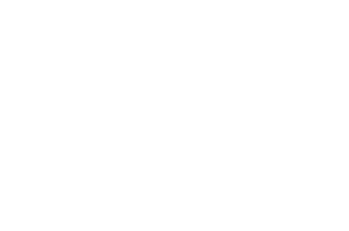

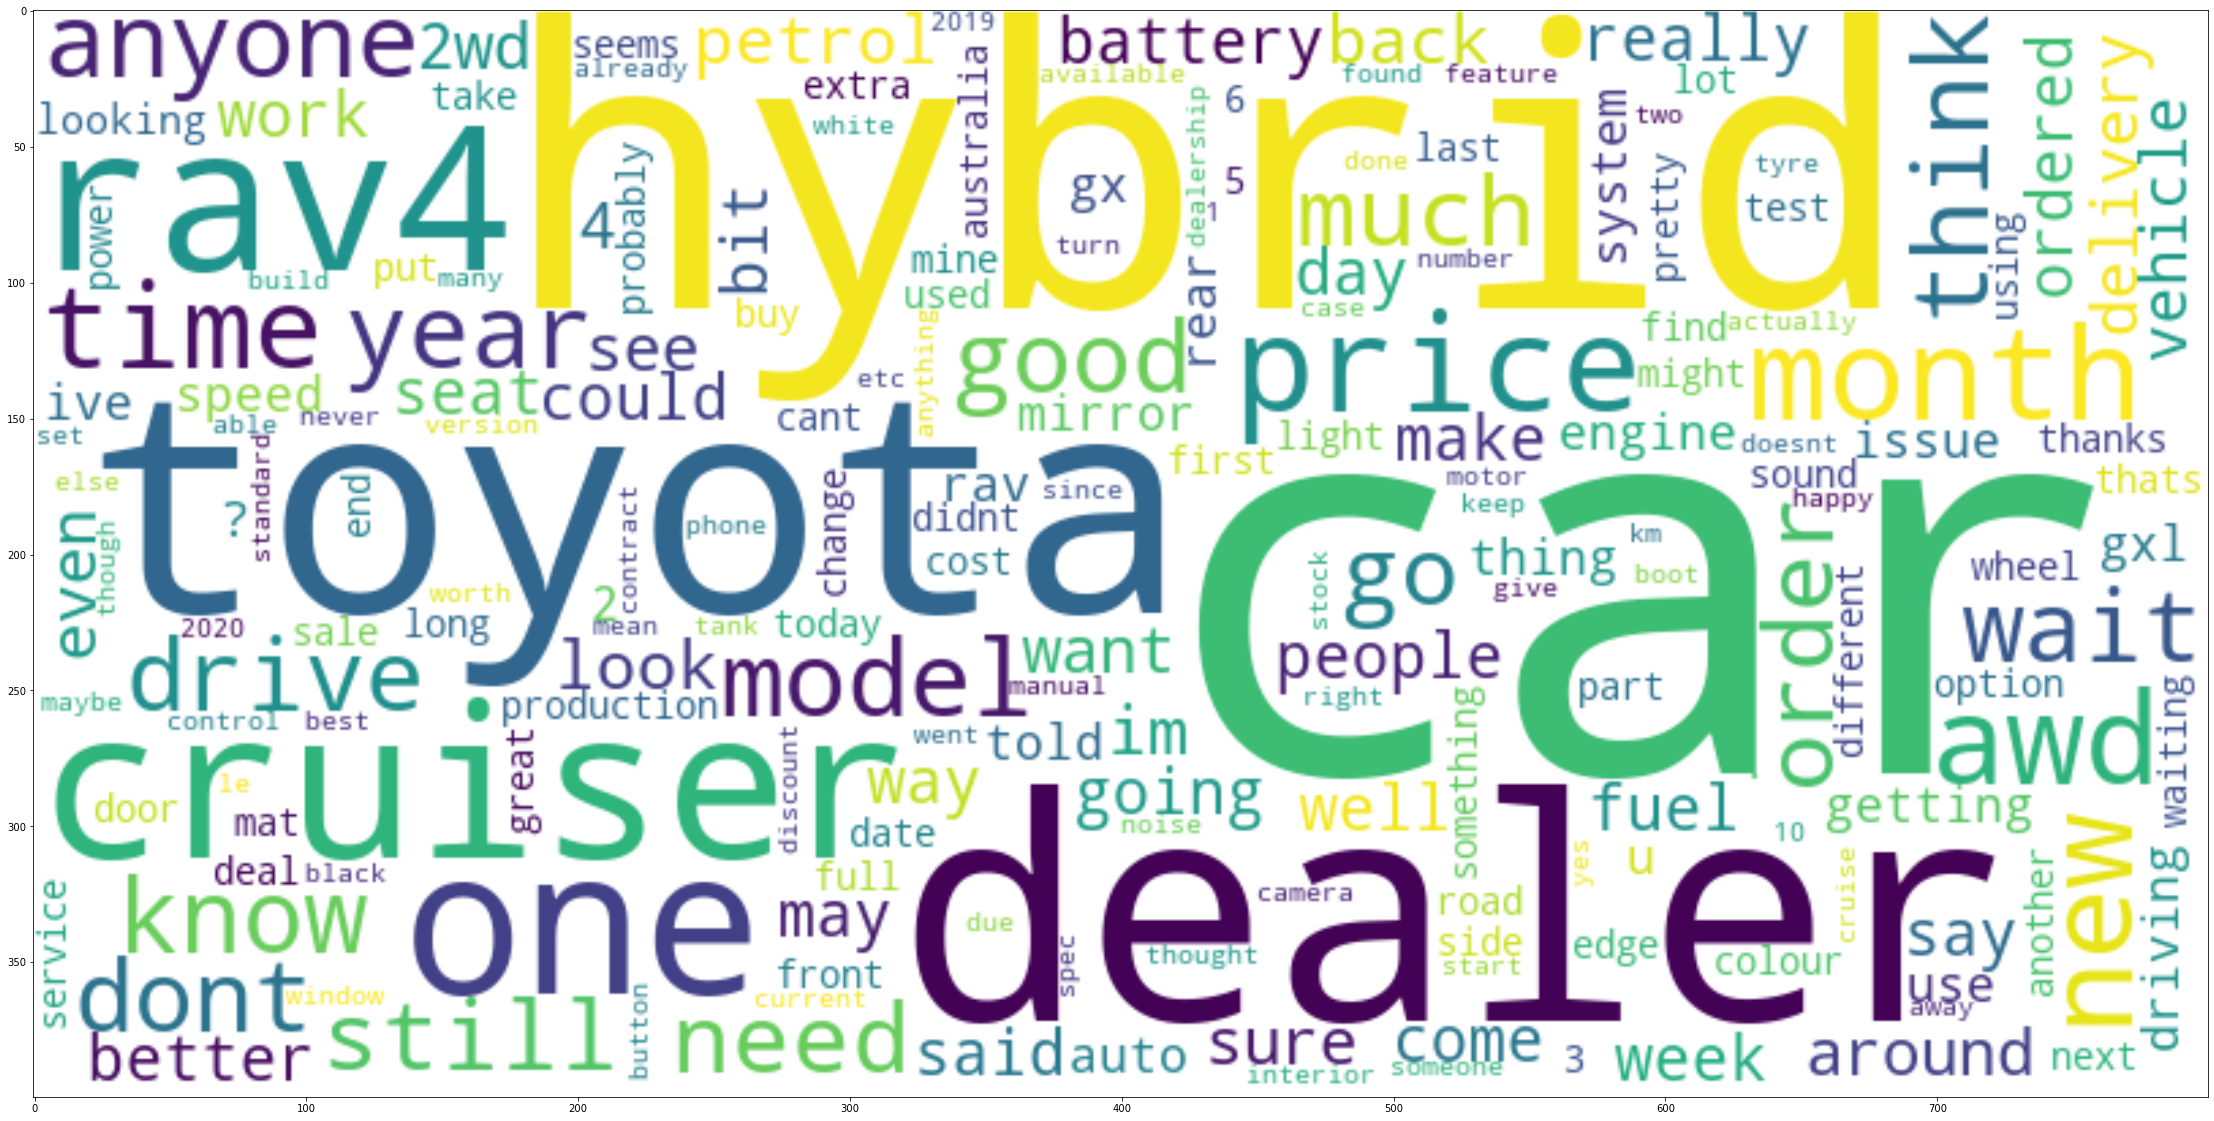

In [26]:
text_count = toyota_rav4_updated.lemmatized_review.explode().value_counts()

# We can also use the count to generate the wordcloud
wordcloud = WordCloud(stopwords=stopword, background_color="white", width=800, height=400).generate_from_frequencies(text_count)
import matplotlib.pyplot as plt
plt.axis("off")
plt.figure( figsize=(40,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [27]:
text_count.head(30)

car        3021
hybrid     2912
dealer     1757
toyota     1718
cruiser    1553
rav4       1413
one        1406
price      1301
month      1179
awd        1106
new        1016
time        921
            872
anyone      847
model       840
know        807
think       791
year        776
drive       750
dont        733
good        723
wait        722
go          700
need        694
still       682
much        675
order       658
petrol      658
im          655
look        649
Name: lemmatized_review, dtype: int64

In [28]:
# stopwords = set(STOPWORDS)
# comment_words = ' '
# for val in toyota_rav4_updated['lemmatized_review']:
 
#     # typecaste each val to string
#     val = str(val)
 
#     # split the value
#     tokens = val.split()
 
#     # Converts each token into lowercase
#     for i in range(len(tokens)):
#         tokens[i] = tokens[i].lower()
 
#     for words in tokens:
#         comment_words = comment_words + words + ' '
 
# wordcloud_2 = WordCloud(width=800, height=800,
#                       background_color='white',
#                       stopwords=stopwords,
#                       min_font_size=10).generate(comment_words)

In [29]:
# # plot the WordCloud image
# plt.figure(figsize=(40,20), facecolor=None)
# plt.imshow(wordcloud_2)
# plt.axis("off")
# plt.tight_layout(pad=0)
# plt.show()

In [30]:
toyota_rav4_review_200 = toyota_rav4[toyota_rav4['Review'].str.len()>200]

In [31]:
toyota_rav4_review_200.head()

Review  Date posted  \
0  New one on Drive looks..interesting.Toyota's n...  2018-Mar-28   
1  Looks pretty good aside from the wheelarch tre...  2018-Mar-28   
2  I saw the pics and was really, really surprise...  2018-Mar-28   
4  Redair writes...Looks great, the Hybrid of thi...  2018-Mar-29   
5  tannins writes...The 2.5 litre hybrid engine i...  2018-Mar-30   

    Reference url  
0  whrl.pl/Re7BHK  
1  whrl.pl/Re7BJK  
2  whrl.pl/Re7BRz  
4  whrl.pl/Re7FeL  
5  whrl.pl/Re7FkM

In [32]:
toyota_rav4_review_200.shape

(4731, 3)

In [33]:
toyota_rav4_review_200_updated = toyota_rav4_review_200.dropna()
toyota_rav4_review_200_updated.isna().sum()

Review           0
Date posted      0
Reference url    0
dtype: int64

In [34]:
toyota_rav4_review_200_updated['no_url'] = toyota_rav4_review_200_updated['Review'].apply(lambda x: remove_URL(x))
toyota_rav4_review_200_updated.head(20)

Review  Date posted  \
0   New one on Drive looks..interesting.Toyota's n...  2018-Mar-28   
1   Looks pretty good aside from the wheelarch tre...  2018-Mar-28   
2   I saw the pics and was really, really surprise...  2018-Mar-28   
4   Redair writes...Looks great, the Hybrid of thi...  2018-Mar-29   
5   tannins writes...The 2.5 litre hybrid engine i...  2018-Mar-30   
14  toyota seem to be banging out increasingly goo...   2018-Oct-5   
16  https://www.youtube.com/watch?v=_yNvcZ03BQQHer...   2018-Oct-5   
23  lazza writes...really? what's wrong with it? w...   2018-Oct-6   
25  lazza writes...have they fixed all the issues ...   2018-Oct-6   
26  Haylonix writes...genuinely looking to get rid...   2018-Oct-7   
27  lazza writes...Wow thanks for the tip. have th...   2018-Oct-7   
29  it would be good if they offered a 2.5L FWD ve...   2018-Oct-7   
32  Bello writes...Bet hybrid will be a smash hitI...   2018-Nov-9   
35  DJSIEK writes...Really hope the hybrid is unde...  2018-Nov-12   
36  individualist writes...152kw for a NA 2.5 litr...  2018-Nov-12   
37  Car looks good inside and out, even the base m...  2018-Nov-12   
38  Roger Scape writes...It would be nice if Toyot...  2018-Nov-13   
42  foresterbloke writes...Which is why there's a ...  2018-Nov-13   
45  Calvin_wp writes...Toyota have basically said ...  2018-Nov-13   
46  Roger Scape writes...The new Rav4 is imo still...  2018-Nov-13   

     Reference url                                             no_url  
0   whrl.pl/Re7BHK  New one on Drive looks..interesting.Toyota's n...  
1   whrl.pl/Re7BJK  Looks pretty good aside from the wheelarch tre...  
2   whrl.pl/Re7BRz  I saw the pics and was really, really surprise...  
4   whrl.pl/Re7FeL  Redair writes...Looks great, the Hybrid of thi...  
5   whrl.pl/Re7FkM  tannins writes...The 2.5 litre hybrid engine i...  
14  whrl.pl/RfeYd7  toyota seem to be banging out increasingly goo...  
16  whrl.pl/RfeYrE   a pre-embargo review, which is more of a firs...  
23  whrl.pl/Rfe0gc  lazza writes...really? what's wrong with it? w...  
25  whrl.pl/Rfe0jP  lazza writes...have they fixed all the issues ...  
26  whrl.pl/Rfe13m  Haylonix writes...genuinely looking to get rid...  
27  whrl.pl/Rfe14v  lazza writes...Wow thanks for the tip. have th...  
29  whrl.pl/Rfe15o  it would be good if they offered a 2.5L FWD ve...  
32  whrl.pl/RfgeBT  Bello writes...Bet hybrid will be a smash hitI...  
35  whrl.pl/Rfgl39  DJSIEK writes...Really hope the hybrid is unde...  
36  whrl.pl/Rfgl5X  individualist writes...152kw for a NA 2.5 litr...  
37  whrl.pl/Rfgl6H  Car looks good inside and out, even the base m...  
38  whrl.pl/RfgmtV  Roger Scape writes...It would be nice if Toyot...  
42  whrl.pl/RfgmKw  foresterbloke writes...Which is why there's a ...  
45  whrl.pl/Rfgm1V  Calvin_wp writes...Toyota have basically said ...  
46  whrl.pl/Rfgm4t  Roger Scape writes...The new Rav4 is imo still...

In [35]:
toyota_rav4_review_200_updated['tokenized'] = toyota_rav4_review_200_updated['no_url'].apply(lambda x: tokenization(x.lower()))
toyota_rav4_review_200_updated.head(10)

Review  Date posted  \
0   New one on Drive looks..interesting.Toyota's n...  2018-Mar-28   
1   Looks pretty good aside from the wheelarch tre...  2018-Mar-28   
2   I saw the pics and was really, really surprise...  2018-Mar-28   
4   Redair writes...Looks great, the Hybrid of thi...  2018-Mar-29   
5   tannins writes...The 2.5 litre hybrid engine i...  2018-Mar-30   
14  toyota seem to be banging out increasingly goo...   2018-Oct-5   
16  https://www.youtube.com/watch?v=_yNvcZ03BQQHer...   2018-Oct-5   
23  lazza writes...really? what's wrong with it? w...   2018-Oct-6   
25  lazza writes...have they fixed all the issues ...   2018-Oct-6   
26  Haylonix writes...genuinely looking to get rid...   2018-Oct-7   

     Reference url                                             no_url  \
0   whrl.pl/Re7BHK  New one on Drive looks..interesting.Toyota's n...   
1   whrl.pl/Re7BJK  Looks pretty good aside from the wheelarch tre...   
2   whrl.pl/Re7BRz  I saw the pics and was really, really surprise...   
4   whrl.pl/Re7FeL  Redair writes...Looks great, the Hybrid of thi...   
5   whrl.pl/Re7FkM  tannins writes...The 2.5 litre hybrid engine i...   
14  whrl.pl/RfeYd7  toyota seem to be banging out increasingly goo...   
16  whrl.pl/RfeYrE   a pre-embargo review, which is more of a firs...   
23  whrl.pl/Rfe0gc  lazza writes...really? what's wrong with it? w...   
25  whrl.pl/Rfe0jP  lazza writes...have they fixed all the issues ...   
26  whrl.pl/Rfe13m  Haylonix writes...genuinely looking to get rid...   

                                            tokenized  
0   [new, one, on, drive, looks..interesting.toyot...  
1   [looks, pretty, good, aside, from, the, wheela...  
2   [i, saw, the, pics, and, was, really,, really,...  
4   [redair, writes...looks, great,, the, hybrid, ...  
5   [tannins, writes...the, 2.5, litre, hybrid, en...  
14  [toyota, seem, to, be, banging, out, increasin...  
16  [, a, pre-embargo, review,, which, is, more, o...  
23  [lazza, writes...really?, what's, wrong, with,...  
25  [lazza, writes...have, they, fixed, all, the, ...  
26  [haylonix, writes...genuinely, looking, to, ge...

In [36]:
toyota_rav4_review_200_updated['no_stopwords'] = toyota_rav4_review_200_updated['tokenized'].apply(lambda x: remove_stopwords(x))
toyota_rav4_review_200_updated.head(10)

Review  Date posted  \
0   New one on Drive looks..interesting.Toyota's n...  2018-Mar-28   
1   Looks pretty good aside from the wheelarch tre...  2018-Mar-28   
2   I saw the pics and was really, really surprise...  2018-Mar-28   
4   Redair writes...Looks great, the Hybrid of thi...  2018-Mar-29   
5   tannins writes...The 2.5 litre hybrid engine i...  2018-Mar-30   
14  toyota seem to be banging out increasingly goo...   2018-Oct-5   
16  https://www.youtube.com/watch?v=_yNvcZ03BQQHer...   2018-Oct-5   
23  lazza writes...really? what's wrong with it? w...   2018-Oct-6   
25  lazza writes...have they fixed all the issues ...   2018-Oct-6   
26  Haylonix writes...genuinely looking to get rid...   2018-Oct-7   

     Reference url                                             no_url  \
0   whrl.pl/Re7BHK  New one on Drive looks..interesting.Toyota's n...   
1   whrl.pl/Re7BJK  Looks pretty good aside from the wheelarch tre...   
2   whrl.pl/Re7BRz  I saw the pics and was really, really surprise...   
4   whrl.pl/Re7FeL  Redair writes...Looks great, the Hybrid of thi...   
5   whrl.pl/Re7FkM  tannins writes...The 2.5 litre hybrid engine i...   
14  whrl.pl/RfeYd7  toyota seem to be banging out increasingly goo...   
16  whrl.pl/RfeYrE   a pre-embargo review, which is more of a firs...   
23  whrl.pl/Rfe0gc  lazza writes...really? what's wrong with it? w...   
25  whrl.pl/Rfe0jP  lazza writes...have they fixed all the issues ...   
26  whrl.pl/Rfe13m  Haylonix writes...genuinely looking to get rid...   

                                            tokenized  \
0   [new, one, on, drive, looks..interesting.toyot...   
1   [looks, pretty, good, aside, from, the, wheela...   
2   [i, saw, the, pics, and, was, really,, really,...   
4   [redair, writes...looks, great,, the, hybrid, ...   
5   [tannins, writes...the, 2.5, litre, hybrid, en...   
14  [toyota, seem, to, be, banging, out, increasin...   
16  [, a, pre-embargo, review,, which, is, more, o...   
23  [lazza, writes...really?, what's, wrong, with,...   
25  [lazza, writes...have, they, fixed, all, the, ...   
26  [haylonix, writes...genuinely, looking, to, ge...   

                                         no_stopwords  
0   [new, one, drive, looks..interesting.toyota's,...  
1   [looks, pretty, good, aside, wheelarch, treatm...  
2   [saw, pics, really,, really, surprised, direct...  
4   [redair, writes...looks, great,, hybrid, car, ...  
5   [tannins, writes...the, 2.5, litre, hybrid, en...  
14  [toyota, seem, banging, increasingly, good, lo...  
16  [, pre-embargo, review,, first, look, car, sin...  
23  [lazza, writes...really?, what's, wrong, it?, ...  
25  [lazza, writes...have, fixed, issues, current,...  
26  [haylonix, writes...genuinely, looking, rid, w...

In [37]:
toyota_rav4_review_200_updated['stemmed_review'] = toyota_rav4_review_200_updated['no_stopwords'].apply(lambda x: stemming(x))
toyota_rav4_review_200_updated.head(10)

Review  Date posted  \
0   New one on Drive looks..interesting.Toyota's n...  2018-Mar-28   
1   Looks pretty good aside from the wheelarch tre...  2018-Mar-28   
2   I saw the pics and was really, really surprise...  2018-Mar-28   
4   Redair writes...Looks great, the Hybrid of thi...  2018-Mar-29   
5   tannins writes...The 2.5 litre hybrid engine i...  2018-Mar-30   
14  toyota seem to be banging out increasingly goo...   2018-Oct-5   
16  https://www.youtube.com/watch?v=_yNvcZ03BQQHer...   2018-Oct-5   
23  lazza writes...really? what's wrong with it? w...   2018-Oct-6   
25  lazza writes...have they fixed all the issues ...   2018-Oct-6   
26  Haylonix writes...genuinely looking to get rid...   2018-Oct-7   

     Reference url                                             no_url  \
0   whrl.pl/Re7BHK  New one on Drive looks..interesting.Toyota's n...   
1   whrl.pl/Re7BJK  Looks pretty good aside from the wheelarch tre...   
2   whrl.pl/Re7BRz  I saw the pics and was really, really surprise...   
4   whrl.pl/Re7FeL  Redair writes...Looks great, the Hybrid of thi...   
5   whrl.pl/Re7FkM  tannins writes...The 2.5 litre hybrid engine i...   
14  whrl.pl/RfeYd7  toyota seem to be banging out increasingly goo...   
16  whrl.pl/RfeYrE   a pre-embargo review, which is more of a firs...   
23  whrl.pl/Rfe0gc  lazza writes...really? what's wrong with it? w...   
25  whrl.pl/Rfe0jP  lazza writes...have they fixed all the issues ...   
26  whrl.pl/Rfe13m  Haylonix writes...genuinely looking to get rid...   

                                            tokenized  \
0   [new, one, on, drive, looks..interesting.toyot...   
1   [looks, pretty, good, aside, from, the, wheela...   
2   [i, saw, the, pics, and, was, really,, really,...   
4   [redair, writes...looks, great,, the, hybrid, ...   
5   [tannins, writes...the, 2.5, litre, hybrid, en...   
14  [toyota, seem, to, be, banging, out, increasin...   
16  [, a, pre-embargo, review,, which, is, more, o...   
23  [lazza, writes...really?, what's, wrong, with,...   
25  [lazza, writes...have, they, fixed, all, the, ...   
26  [haylonix, writes...genuinely, looking, to, ge...   

                                         no_stopwords  \
0   [new, one, drive, looks..interesting.toyota's,...   
1   [looks, pretty, good, aside, wheelarch, treatm...   
2   [saw, pics, really,, really, surprised, direct...   
4   [redair, writes...looks, great,, hybrid, car, ...   
5   [tannins, writes...the, 2.5, litre, hybrid, en...   
14  [toyota, seem, banging, increasingly, good, lo...   
16  [, pre-embargo, review,, first, look, car, sin...   
23  [lazza, writes...really?, what's, wrong, it?, ...   
25  [lazza, writes...have, fixed, issues, current,...   
26  [haylonix, writes...genuinely, looking, rid, w...   

                                       stemmed_review  
0   [new, one, drive, looks..interesting.toyota', ...  
1   [look, pretti, good, asid, wheelarch, treatmen...  
2   [saw, pic, really,, realli, surpris, direction...  
4   [redair, writes...look, great,, hybrid, car, h...  
5   [tannin, writes...th, 2.5, litr, hybrid, engin...  
14  [toyota, seem, bang, increasingli, good, look,...  
16  [, pre-embargo, review,, first, look, car, sin...  
23  [lazza, writes...really?, what', wrong, it?, m...  
25  [lazza, writes...hav, fix, issu, current, gene...  
26  [haylonix, writes...genuin, look, rid, well, k...

In [38]:
toyota_rav4_review_200_updated['lemmatized_review'] = toyota_rav4_review_200_updated['no_stopwords'].apply(lambda x: lemmatizer(x))
toyota_rav4_review_200_updated.head(10)

Review  Date posted  \
0   New one on Drive looks..interesting.Toyota's n...  2018-Mar-28   
1   Looks pretty good aside from the wheelarch tre...  2018-Mar-28   
2   I saw the pics and was really, really surprise...  2018-Mar-28   
4   Redair writes...Looks great, the Hybrid of thi...  2018-Mar-29   
5   tannins writes...The 2.5 litre hybrid engine i...  2018-Mar-30   
14  toyota seem to be banging out increasingly goo...   2018-Oct-5   
16  https://www.youtube.com/watch?v=_yNvcZ03BQQHer...   2018-Oct-5   
23  lazza writes...really? what's wrong with it? w...   2018-Oct-6   
25  lazza writes...have they fixed all the issues ...   2018-Oct-6   
26  Haylonix writes...genuinely looking to get rid...   2018-Oct-7   

     Reference url                                             no_url  \
0   whrl.pl/Re7BHK  New one on Drive looks..interesting.Toyota's n...   
1   whrl.pl/Re7BJK  Looks pretty good aside from the wheelarch tre...   
2   whrl.pl/Re7BRz  I saw the pics and was really, really surprise...   
4   whrl.pl/Re7FeL  Redair writes...Looks great, the Hybrid of thi...   
5   whrl.pl/Re7FkM  tannins writes...The 2.5 litre hybrid engine i...   
14  whrl.pl/RfeYd7  toyota seem to be banging out increasingly goo...   
16  whrl.pl/RfeYrE   a pre-embargo review, which is more of a firs...   
23  whrl.pl/Rfe0gc  lazza writes...really? what's wrong with it? w...   
25  whrl.pl/Rfe0jP  lazza writes...have they fixed all the issues ...   
26  whrl.pl/Rfe13m  Haylonix writes...genuinely looking to get rid...   

                                            tokenized  \
0   [new, one, on, drive, looks..interesting.toyot...   
1   [looks, pretty, good, aside, from, the, wheela...   
2   [i, saw, the, pics, and, was, really,, really,...   
4   [redair, writes...looks, great,, the, hybrid, ...   
5   [tannins, writes...the, 2.5, litre, hybrid, en...   
14  [toyota, seem, to, be, banging, out, increasin...   
16  [, a, pre-embargo, review,, which, is, more, o...   
23  [lazza, writes...really?, what's, wrong, with,...   
25  [lazza, writes...have, they, fixed, all, the, ...   
26  [haylonix, writes...genuinely, looking, to, ge...   

                                         no_stopwords  \
0   [new, one, drive, looks..interesting.toyota's,...   
1   [looks, pretty, good, aside, wheelarch, treatm...   
2   [saw, pics, really,, really, surprised, direct...   
4   [redair, writes...looks, great,, hybrid, car, ...   
5   [tannins, writes...the, 2.5, litre, hybrid, en...   
14  [toyota, seem, banging, increasingly, good, lo...   
16  [, pre-embargo, review,, first, look, car, sin...   
23  [lazza, writes...really?, what's, wrong, it?, ...   
25  [lazza, writes...have, fixed, issues, current,...   
26  [haylonix, writes...genuinely, looking, rid, w...   

                                       stemmed_review  \
0   [new, one, drive, looks..interesting.toyota', ...   
1   [look, pretti, good, asid, wheelarch, treatmen...   
2   [saw, pic, really,, realli, surpris, direction...   
4   [redair, writes...look, great,, hybrid, car, h...   
5   [tannin, writes...th, 2.5, litr, hybrid, engin...   
14  [toyota, seem, bang, increasingli, good, look,...   
16  [, pre-embargo, review,, first, look, car, sin...   
23  [lazza, writes...really?, what', wrong, it?, m...   
25  [lazza, writes...hav, fix, issu, current, gene...   
26  [haylonix, writes...genuin, look, rid, well, k...   

                                    lemmatized_review  
0   [new, one, drive, looks..interesting.toyota's,...  
1   [look, pretty, good, aside, wheelarch, treatme...  
2   [saw, pic, really,, really, surprised, directi...  
4   [redair, writes...looks, great,, hybrid, car, ...  
5   [tannin, writes...the, 2.5, litre, hybrid, eng...  
14  [toyota, seem, banging, increasingly, good, lo...  
16  [, pre-embargo, review,, first, look, car, sin...  
23  [lazza, writes...really?, what's, wrong, it?, ...  
25  [lazza, writes...have, fixed, issue, current, ...  
26  [haylonix, writes...genu

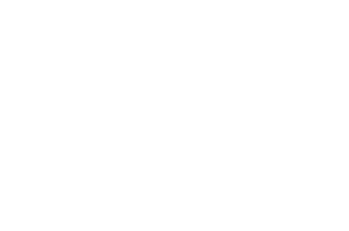

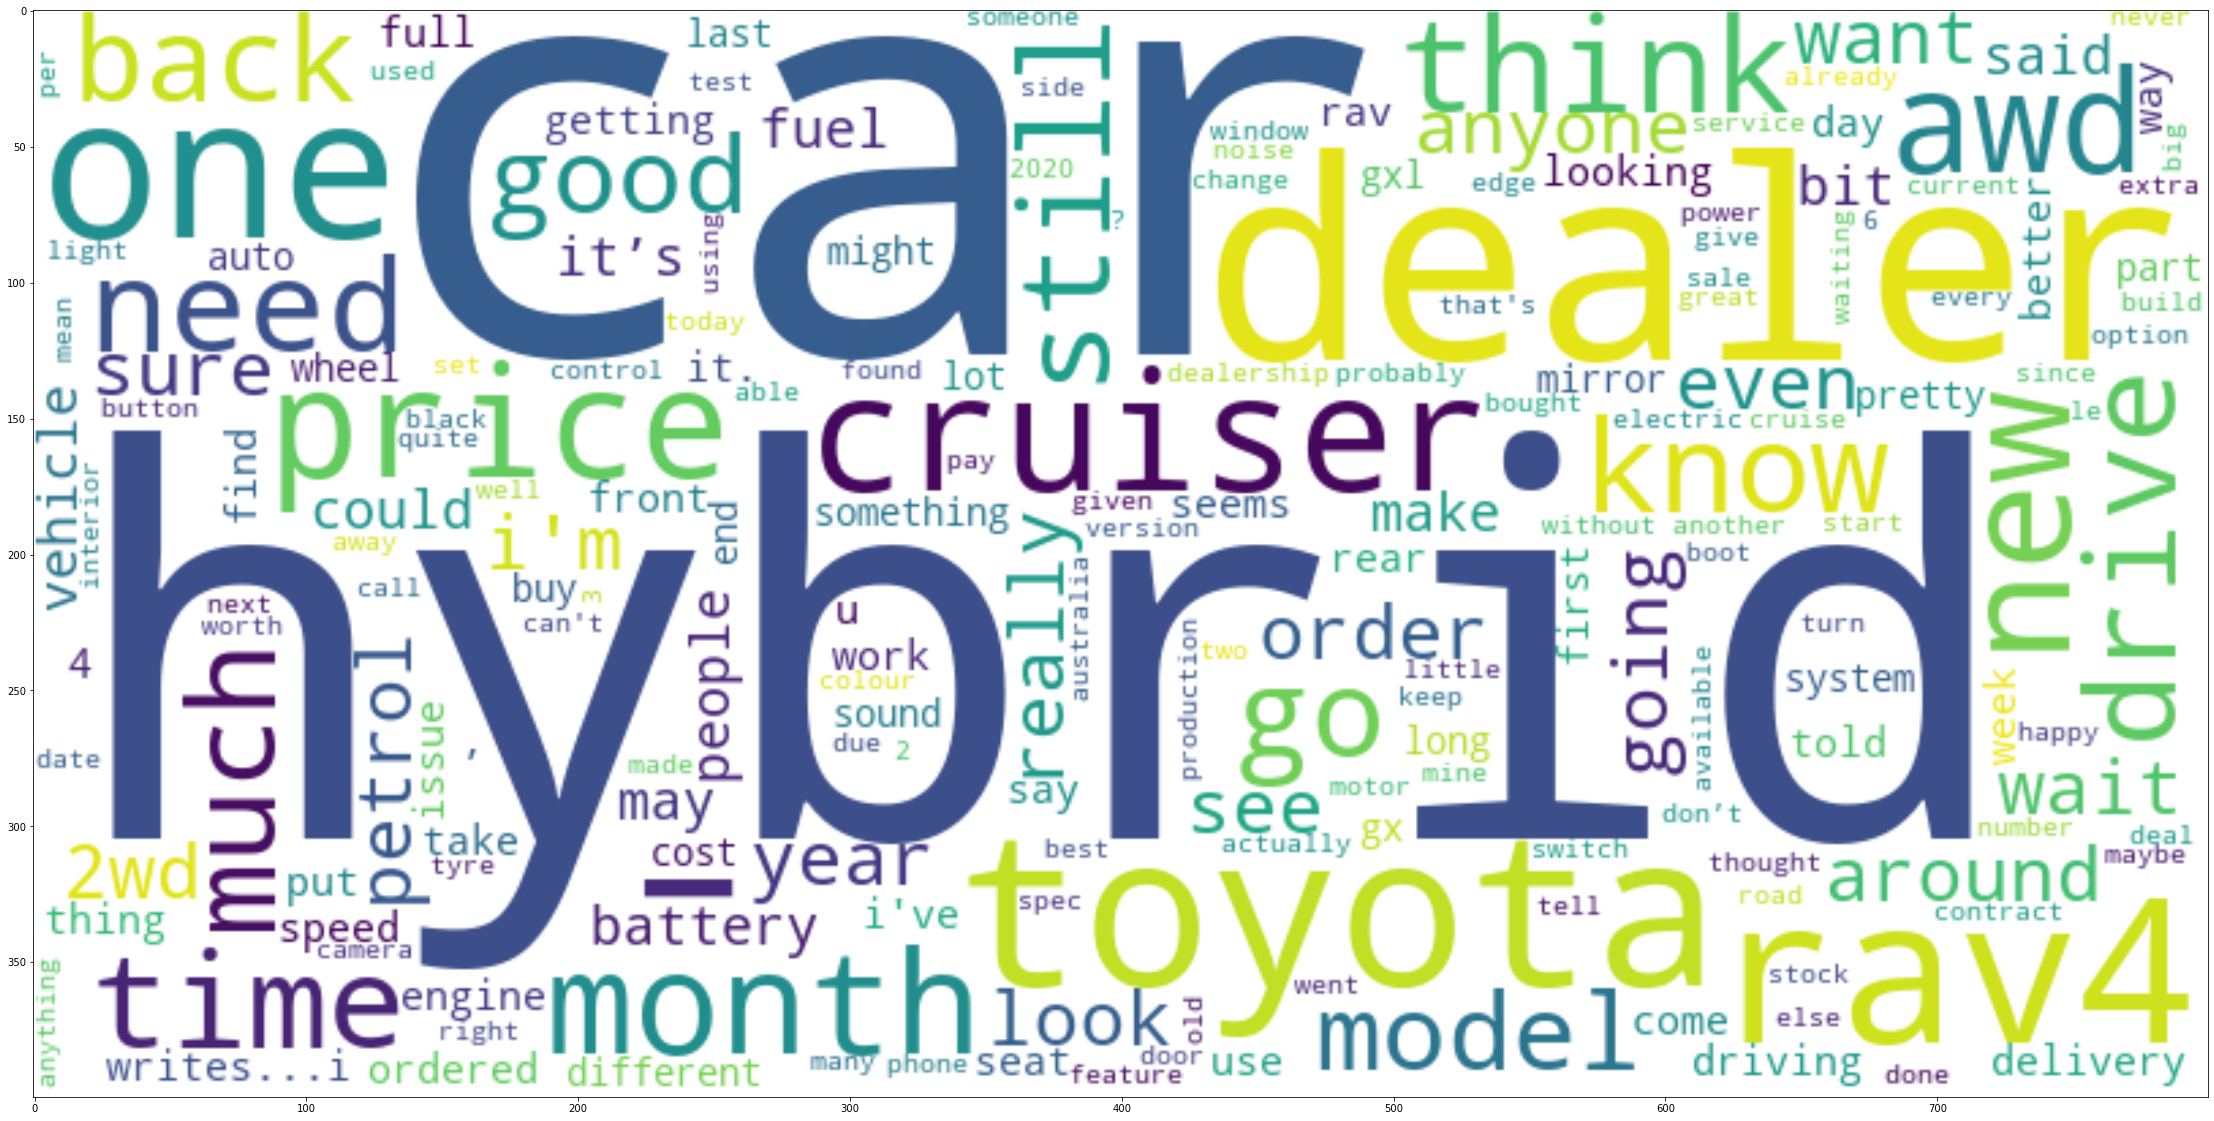

In [39]:
text_count_2 = toyota_rav4_review_200_updated.lemmatized_review.explode().value_counts()

# We can also use the count to generate the wordcloud
wordcloud_2 = WordCloud(stopwords=stopword, background_color="white", width=800, height=400).generate_from_frequencies(text_count_2)
import matplotlib.pyplot as plt
plt.axis("off")
plt.figure( figsize=(40,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud_2, interpolation='bilinear')
plt.show()

In [40]:
text_count_2.head(30)

car        2177
hybrid     1858
dealer     1272
toyota     1181
–          1112
rav4       1025
one         995
cruiser     944
price       804
new         775
month       714
awd         680
think       609
time        598
need        583
know        568
go          549
drive       548
still       542
much        525
back        503
model       487
good        487
anyone      486
year        485
see         475
order       469
around      467
look        456
petrol      453
Name: lemmatized_review, dtype: int64

### filtering by date

In [41]:
toyota_rav4_review_200_updated['Date posted'] = pd.to_datetime(toyota_rav4_review_200_updated['Date posted'])

In [42]:
toyota_rav4_review_200_updated.head()

Review Date posted  \
0  New one on Drive looks..interesting.Toyota's n...  2018-03-28   
1  Looks pretty good aside from the wheelarch tre...  2018-03-28   
2  I saw the pics and was really, really surprise...  2018-03-28   
4  Redair writes...Looks great, the Hybrid of thi...  2018-03-29   
5  tannins writes...The 2.5 litre hybrid engine i...  2018-03-30   

    Reference url                                             no_url  \
0  whrl.pl/Re7BHK  New one on Drive looks..interesting.Toyota's n...   
1  whrl.pl/Re7BJK  Looks pretty good aside from the wheelarch tre...   
2  whrl.pl/Re7BRz  I saw the pics and was really, really surprise...   
4  whrl.pl/Re7FeL  Redair writes...Looks great, the Hybrid of thi...   
5  whrl.pl/Re7FkM  tannins writes...The 2.5 litre hybrid engine i...   

                                           tokenized  \
0  [new, one, on, drive, looks..interesting.toyot...   
1  [looks, pretty, good, aside, from, the, wheela...   
2  [i, saw, the, pics, and, was, really,, really,...   
4  [redair, writes...looks, great,, the, hybrid, ...   
5  [tannins, writes...the, 2.5, litre, hybrid, en...   

                                        no_stopwords  \
0  [new, one, drive, looks..interesting.toyota's,...   
1  [looks, pretty, good, aside, wheelarch, treatm...   
2  [saw, pics, really,, really, surprised, direct...   
4  [redair, writes...looks, great,, hybrid, car, ...   
5  [tannins, writes...the, 2.5, litre, hybrid, en...   

                                      stemmed_review  \
0  [new, one, drive, looks..interesting.toyota', ...   
1  [look, pretti, good, asid, wheelarch, treatmen...   
2  [saw, pic, really,, realli, surpris, direction...   
4  [redair, writes...look, great,, hybrid, car, h...   
5  [tannin, writes...th, 2.5, litr, hybrid, engin...   

                                   lemmatized_review  
0  [new, one, drive, looks..interesting.toyota's,...  
1  [look, pretty, good, aside, wheelarch, treatme...  
2  [saw, pic, really,, really, surprised, directi...  
4  [redair, writes...looks, great,, hybrid, car, ...  
5  [tannin, writes...the, 2.5, litre, hybrid, eng...

In [43]:
toyota_rav4_date =  toyota_rav4_review_200_updated.loc[(toyota_rav4_review_200_updated['Date posted'] >= '2019-05-14')]

In [44]:
toyota_rav4_date.head()

Review Date posted  \
433  Agree. Second row room seems fine to me. I'm 6...  2019-05-14   
434  Menco writes...Gee dont know how much room you...  2019-05-14   
435  It's not so much how much room rear passengers...  2019-05-14   
436  JRCD1 writes...Where I found issue with the Ra...  2019-05-14   
438  Demegod writes...Care to tell us the electric ...  2019-05-14   

      Reference url                                             no_url  \
433  whrl.pl/RfmIPF  Agree. Second row room seems fine to me. I'm 6...   
434  whrl.pl/RfmIVE  Menco writes...Gee dont know how much room you...   
435  whrl.pl/RfmI6y  It's not so much how much room rear passengers...   
436  whrl.pl/RfmJfi  JRCD1 writes...Where I found issue with the Ra...   
438  whrl.pl/RfmJkx  Demegod writes...Care to tell us the electric ...   

                                             tokenized  \
433  [agree., second, row, room, seems, fine, to, m...   
434  [menco, writes...gee, dont, know, how, much, r...   
435  [it's, not, so, much, how, much, room, rear, p...   
436  [jrcd1, writes...where, i, found, issue, with,...   
438  [demegod, writes...care, to, tell, us, the, el...   

                                          no_stopwords  \
433  [agree., second, row, room, seems, fine, me., ...   
434  [menco, writes...gee, dont, know, much, room, ...   
435  [much, much, room, rear, passengers, rearward,...   
436  [jrcd1, writes...where, found, issue, rav4, fr...   
438  [demegod, writes...care, tell, us, electric, r...   

                                        stemmed_review  \
433  [agree., second, row, room, seem, fine, me., i...   
434  [menco, writes...ge, dont, know, much, room, n...   
435  [much, much, room, rear, passeng, rearward, fa...   
436  [jrcd1, writes...wher, found, issu, rav4, fron...   
438  [demegod, writes...car, tell, us, electr, rang...   

                                     lemmatized_review  
433  [agree., second, row, room, seems, fine, me., ...  
434  [menco, writes...gee, dont, know, much, room, ...  
435  [much, much, room, rear, passenger, rearward, ...  
436  [jrcd1, writes...where, found, issue, rav4, fr...  
438  [demegod, writes...care, tell, u, electric, ra...

In [45]:
toyota_rav4_date.count()

Review               4522
Date posted          4522
Reference url        4522
no_url               4522
tokenized            4522
no_stopwords         4522
stemmed_review       4522
lemmatized_review    4522
dtype: int64

In [46]:
toyota_rav4_date['no_url'] = toyota_rav4_date['Review'].apply(lambda x: remove_URL(x))
toyota_rav4_date.head(20)

Review Date posted  \
433  Agree. Second row room seems fine to me. I'm 6...  2019-05-14   
434  Menco writes...Gee dont know how much room you...  2019-05-14   
435  It's not so much how much room rear passengers...  2019-05-14   
436  JRCD1 writes...Where I found issue with the Ra...  2019-05-14   
438  Demegod writes...Care to tell us the electric ...  2019-05-14   
439  AMG S writes...The second row feel a bit small...  2019-05-14   
441  Demegod writes...So, I wonder why no plug in o...  2019-05-14   
442  Punchcard writes...A Prius Hybrid (NiMH models...  2019-05-14   
443  Kilavan writes...very impressed with Honda CRV...  2019-05-14   
444  Kilavan writes...I very impressed with Honda C...  2019-05-14   
445  aesthetics1210 writes...Going to test drive a ...  2019-05-14   
447  Got atomic rush colour  2.5L cruiser hybrid 2w...  2019-05-14   
448  #Tonez writes...Got atomic rush colour  2.5L c...  2019-05-14   
450  AMG S writes...42.5 k driveaway? That’s very g...  2019-05-14   
452  Gamilon writes...4K of rrp? That's amazing. We...  2019-05-14   
460  Do people find the 2WD and AWD different in te...  2019-05-15   
462  user8976 writes...Do people find the 2WD and A...  2019-05-15   
463  Calvin_wp writes...power units are obviously n...  2019-05-15   
465  Driver6M writes...Not exactly. The AWD hybrid ...  2019-05-15   
467  Anyone had experience purchase  a new car inte...  2019-05-15   

      Reference url                                             no_url  \
433  whrl.pl/RfmIPF  Agree. Second row room seems fine to me. I'm 6...   
434  whrl.pl/RfmIVE  Menco writes...Gee dont know how much room you...   
435  whrl.pl/RfmI6y  It's not so much how much room rear passengers...   
436  whrl.pl/RfmJfi  JRCD1 writes...Where I found issue with the Ra...   
438  whrl.pl/RfmJkx  Demegod writes...Care to tell us the electric ...   
439  whrl.pl/RfmJk6  AMG S writes...The second row feel a bit small...   
441  whrl.pl/RfmJml  Demegod writes...So, I wonder why no plug in o...   
442  whrl.pl/RfmJmw  Punchcard writes...A Prius Hybrid (NiMH models...   
443  whrl.pl/RfmJnM  Kilavan writes...very impressed with Honda CRV...   
444  whrl.pl/RfmJpd  Kilavan writes...I very impressed with Honda C...   
445  whrl.pl/RfmJqy  aesthetics1210 writes...Going to test drive a ...   
447  whrl.pl/RfmJOL  Got atomic rush colour  2.5L cruiser hybrid 2w...   
448  whrl.pl/RfmJRH  #Tonez writes...Got atomic rush colour  2.5L c...   
450  whrl.pl/RfmJXH  AMG S writes...42.5 k driveaway? That’s very g...   
452  whrl.pl/RfmJ1i  Gamilon writes...4K of rrp? That's amazing. We...   
460  whrl.pl/RfmK4C  Do people find the 2WD and AWD different in te...   
462  whrl.pl/RfmLf9  user8976 writes...Do people find the 2WD and A...   
463  whrl.pl/RfmLh0  Calvin_wp writes...power units are obviously n...   
465  whrl.pl/RfmLj9  Driver6M writes...Not exactly. The AWD hybrid ...   
467  whrl.pl/RfmLzR  Anyone had experience purchase  a new car inte...   

                                             tokenized  \
433  [agree., second, row, room, seems, fine, to, m...   
434  [menco, writes...gee, dont, know, how, much, r...   
435  [it's, not, so, much, how, much, room, rear, p...   
436  [jrcd1, writes...where, i, found, issue, with,...   
438  [demegod, writes...care, to, tell, us, the, el...   
439  [amg, s, writes...the, second, row, feel, a, b...   
441  [demegod, writes...so,, i, wonder, why, no, pl...   
442  [punchcard, writes...a, prius, hybrid, (nimh, ...   
443  [kilavan, writes...very, impressed, with, hond...   
444  [kilavan, writes...i, very, impressed, with, h...   
445  [aesthetics1210, writes...going, to, test, dri...   
447  [got, atomic, rush, colour, 2.5l, cruiser, hyb...   
448  [#tonez, writes...got, atomic, rush, colour, 2...   
450  [amg, s, writes...42.5, k, driveaway?, that’s,...   
452  [gamilon, writes...4k, of, rrp?, that's, amazi...   
460  [do, people, find, the, 2wd, and, awd, differe...   
462  [user8976, writes...do, people,

In [47]:
toyota_rav4_date['tokenized'] = toyota_rav4_date['no_url'].apply(lambda x: tokenization(x.lower()))
toyota_rav4_date.head(10)

Review Date posted  \
433  Agree. Second row room seems fine to me. I'm 6...  2019-05-14   
434  Menco writes...Gee dont know how much room you...  2019-05-14   
435  It's not so much how much room rear passengers...  2019-05-14   
436  JRCD1 writes...Where I found issue with the Ra...  2019-05-14   
438  Demegod writes...Care to tell us the electric ...  2019-05-14   
439  AMG S writes...The second row feel a bit small...  2019-05-14   
441  Demegod writes...So, I wonder why no plug in o...  2019-05-14   
442  Punchcard writes...A Prius Hybrid (NiMH models...  2019-05-14   
443  Kilavan writes...very impressed with Honda CRV...  2019-05-14   
444  Kilavan writes...I very impressed with Honda C...  2019-05-14   

      Reference url                                             no_url  \
433  whrl.pl/RfmIPF  Agree. Second row room seems fine to me. I'm 6...   
434  whrl.pl/RfmIVE  Menco writes...Gee dont know how much room you...   
435  whrl.pl/RfmI6y  It's not so much how much room rear passengers...   
436  whrl.pl/RfmJfi  JRCD1 writes...Where I found issue with the Ra...   
438  whrl.pl/RfmJkx  Demegod writes...Care to tell us the electric ...   
439  whrl.pl/RfmJk6  AMG S writes...The second row feel a bit small...   
441  whrl.pl/RfmJml  Demegod writes...So, I wonder why no plug in o...   
442  whrl.pl/RfmJmw  Punchcard writes...A Prius Hybrid (NiMH models...   
443  whrl.pl/RfmJnM  Kilavan writes...very impressed with Honda CRV...   
444  whrl.pl/RfmJpd  Kilavan writes...I very impressed with Honda C...   

                                             tokenized  \
433  [agree., second, row, room, seems, fine, to, m...   
434  [menco, writes...gee, dont, know, how, much, r...   
435  [it's, not, so, much, how, much, room, rear, p...   
436  [jrcd1, writes...where, i, found, issue, with,...   
438  [demegod, writes...care, to, tell, us, the, el...   
439  [amg, s, writes...the, second, row, feel, a, b...   
441  [demegod, writes...so,, i, wonder, why, no, pl...   
442  [punchcard, writes...a, prius, hybrid, (nimh, ...   
443  [kilavan, writes...very, impressed, with, hond...   
444  [kilavan, writes...i, very, impressed, with, h...   

                                          no_stopwords  \
433  [agree., second, row, room, seems, fine, me., ...   
434  [menco, writes...gee, dont, know, much, room, ...   
435  [much, much, room, rear, passengers, rearward,...   
436  [jrcd1, writes...where, found, issue, rav4, fr...   
438  [demegod, writes...care, tell, us, electric, r...   
439  [amg, writes...the, second, row, feel, bit, sm...   
441  [demegod, writes...so,, wonder, plug, option.,...   
442  [punchcard, writes...a, prius, hybrid, (nimh, ...   
443  [kilavan, writes...very, impressed, honda, crv...   
444  [kilavan, writes...i, impressed, honda, crv, 2...   

                                        stemmed_review  \
433  [agree., second, row, room, seem, fine, me., i...   
434  [menco, writes...ge, dont, know, much, room, n...   
435  [much, much, room, rear, passeng, rearward, fa...   
436  [jrcd1, writes...wher, found, issu, rav4, fron...   
438  [demegod, writes...car, tell, us, electr, rang...   
439  [amg, writes...th, second, row, feel, bit, sma...   
441  [demegod, writes...so,, wonder, plug, option.,...   
442  [punchcard, writes...a, priu, hybrid, (nimh, m...   
443  [kilavan, writes...veri, impress, honda, crv, ...   
444  [kilavan, writes...i, impress, honda, crv, 201...   

                                     lemmatized_review  
433  [agree., second, row, room, seems, fine, me., ...  
434  [menco, writes...gee, dont, know, much, room, ...  
435  [much, much, room, rear, passenger, rearward, ...  
436  [jrcd1, writes...where, found, issue, rav4, fr...  
438  [demegod, writes...care, tell, u, electric, ra...  
439  [amg, writes...the, second, row, feel, bit, sm...  
441  [demegod, writes...so,, wonder, plug, option.,...  
442  [punchcard, writes...a, prius, hybrid, (nimh, ...  
443  [kilavan, writes...very, im

In [48]:
toyota_rav4_date['no_stopwords'] = toyota_rav4_date['tokenized'].apply(lambda x: remove_stopwords(x))
toyota_rav4_date.head(10)

Review Date posted  \
433  Agree. Second row room seems fine to me. I'm 6...  2019-05-14   
434  Menco writes...Gee dont know how much room you...  2019-05-14   
435  It's not so much how much room rear passengers...  2019-05-14   
436  JRCD1 writes...Where I found issue with the Ra...  2019-05-14   
438  Demegod writes...Care to tell us the electric ...  2019-05-14   
439  AMG S writes...The second row feel a bit small...  2019-05-14   
441  Demegod writes...So, I wonder why no plug in o...  2019-05-14   
442  Punchcard writes...A Prius Hybrid (NiMH models...  2019-05-14   
443  Kilavan writes...very impressed with Honda CRV...  2019-05-14   
444  Kilavan writes...I very impressed with Honda C...  2019-05-14   

      Reference url                                             no_url  \
433  whrl.pl/RfmIPF  Agree. Second row room seems fine to me. I'm 6...   
434  whrl.pl/RfmIVE  Menco writes...Gee dont know how much room you...   
435  whrl.pl/RfmI6y  It's not so much how much room rear passengers...   
436  whrl.pl/RfmJfi  JRCD1 writes...Where I found issue with the Ra...   
438  whrl.pl/RfmJkx  Demegod writes...Care to tell us the electric ...   
439  whrl.pl/RfmJk6  AMG S writes...The second row feel a bit small...   
441  whrl.pl/RfmJml  Demegod writes...So, I wonder why no plug in o...   
442  whrl.pl/RfmJmw  Punchcard writes...A Prius Hybrid (NiMH models...   
443  whrl.pl/RfmJnM  Kilavan writes...very impressed with Honda CRV...   
444  whrl.pl/RfmJpd  Kilavan writes...I very impressed with Honda C...   

                                             tokenized  \
433  [agree., second, row, room, seems, fine, to, m...   
434  [menco, writes...gee, dont, know, how, much, r...   
435  [it's, not, so, much, how, much, room, rear, p...   
436  [jrcd1, writes...where, i, found, issue, with,...   
438  [demegod, writes...care, to, tell, us, the, el...   
439  [amg, s, writes...the, second, row, feel, a, b...   
441  [demegod, writes...so,, i, wonder, why, no, pl...   
442  [punchcard, writes...a, prius, hybrid, (nimh, ...   
443  [kilavan, writes...very, impressed, with, hond...   
444  [kilavan, writes...i, very, impressed, with, h...   

                                          no_stopwords  \
433  [agree., second, row, room, seems, fine, me., ...   
434  [menco, writes...gee, dont, know, much, room, ...   
435  [much, much, room, rear, passengers, rearward,...   
436  [jrcd1, writes...where, found, issue, rav4, fr...   
438  [demegod, writes...care, tell, us, electric, r...   
439  [amg, writes...the, second, row, feel, bit, sm...   
441  [demegod, writes...so,, wonder, plug, option.,...   
442  [punchcard, writes...a, prius, hybrid, (nimh, ...   
443  [kilavan, writes...very, impressed, honda, crv...   
444  [kilavan, writes...i, impressed, honda, crv, 2...   

                                        stemmed_review  \
433  [agree., second, row, room, seem, fine, me., i...   
434  [menco, writes...ge, dont, know, much, room, n...   
435  [much, much, room, rear, passeng, rearward, fa...   
436  [jrcd1, writes...wher, found, issu, rav4, fron...   
438  [demegod, writes...car, tell, us, electr, rang...   
439  [amg, writes...th, second, row, feel, bit, sma...   
441  [demegod, writes...so,, wonder, plug, option.,...   
442  [punchcard, writes...a, priu, hybrid, (nimh, m...   
443  [kilavan, writes...veri, impress, honda, crv, ...   
444  [kilavan, writes...i, impress, honda, crv, 201...   

                                     lemmatized_review  
433  [agree., second, row, room, seems, fine, me., ...  
434  [menco, writes...gee, dont, know, much, room, ...  
435  [much, much, room, rear, passenger, rearward, ...  
436  [jrcd1, writes...where, found, issue, rav4, fr...  
438  [demegod, writes...care, tell, u, electric, ra...  
439  [amg, writes...the, second, row, feel, bit, sm...  
441  [demegod, writes...so,, wonder, plug, option.,...  
442  [punchcard, writes...a, prius, hybrid, (nimh, ...  
443  [kilavan, writes...very, im

In [49]:
toyota_rav4_date['stemmed_review'] = toyota_rav4_date['no_stopwords'].apply(lambda x: stemming(x))
toyota_rav4_date.head(10)

Review Date posted  \
433  Agree. Second row room seems fine to me. I'm 6...  2019-05-14   
434  Menco writes...Gee dont know how much room you...  2019-05-14   
435  It's not so much how much room rear passengers...  2019-05-14   
436  JRCD1 writes...Where I found issue with the Ra...  2019-05-14   
438  Demegod writes...Care to tell us the electric ...  2019-05-14   
439  AMG S writes...The second row feel a bit small...  2019-05-14   
441  Demegod writes...So, I wonder why no plug in o...  2019-05-14   
442  Punchcard writes...A Prius Hybrid (NiMH models...  2019-05-14   
443  Kilavan writes...very impressed with Honda CRV...  2019-05-14   
444  Kilavan writes...I very impressed with Honda C...  2019-05-14   

      Reference url                                             no_url  \
433  whrl.pl/RfmIPF  Agree. Second row room seems fine to me. I'm 6...   
434  whrl.pl/RfmIVE  Menco writes...Gee dont know how much room you...   
435  whrl.pl/RfmI6y  It's not so much how much room rear passengers...   
436  whrl.pl/RfmJfi  JRCD1 writes...Where I found issue with the Ra...   
438  whrl.pl/RfmJkx  Demegod writes...Care to tell us the electric ...   
439  whrl.pl/RfmJk6  AMG S writes...The second row feel a bit small...   
441  whrl.pl/RfmJml  Demegod writes...So, I wonder why no plug in o...   
442  whrl.pl/RfmJmw  Punchcard writes...A Prius Hybrid (NiMH models...   
443  whrl.pl/RfmJnM  Kilavan writes...very impressed with Honda CRV...   
444  whrl.pl/RfmJpd  Kilavan writes...I very impressed with Honda C...   

                                             tokenized  \
433  [agree., second, row, room, seems, fine, to, m...   
434  [menco, writes...gee, dont, know, how, much, r...   
435  [it's, not, so, much, how, much, room, rear, p...   
436  [jrcd1, writes...where, i, found, issue, with,...   
438  [demegod, writes...care, to, tell, us, the, el...   
439  [amg, s, writes...the, second, row, feel, a, b...   
441  [demegod, writes...so,, i, wonder, why, no, pl...   
442  [punchcard, writes...a, prius, hybrid, (nimh, ...   
443  [kilavan, writes...very, impressed, with, hond...   
444  [kilavan, writes...i, very, impressed, with, h...   

                                          no_stopwords  \
433  [agree., second, row, room, seems, fine, me., ...   
434  [menco, writes...gee, dont, know, much, room, ...   
435  [much, much, room, rear, passengers, rearward,...   
436  [jrcd1, writes...where, found, issue, rav4, fr...   
438  [demegod, writes...care, tell, us, electric, r...   
439  [amg, writes...the, second, row, feel, bit, sm...   
441  [demegod, writes...so,, wonder, plug, option.,...   
442  [punchcard, writes...a, prius, hybrid, (nimh, ...   
443  [kilavan, writes...very, impressed, honda, crv...   
444  [kilavan, writes...i, impressed, honda, crv, 2...   

                                        stemmed_review  \
433  [agree., second, row, room, seem, fine, me., i...   
434  [menco, writes...ge, dont, know, much, room, n...   
435  [much, much, room, rear, passeng, rearward, fa...   
436  [jrcd1, writes...wher, found, issu, rav4, fron...   
438  [demegod, writes...car, tell, us, electr, rang...   
439  [amg, writes...th, second, row, feel, bit, sma...   
441  [demegod, writes...so,, wonder, plug, option.,...   
442  [punchcard, writes...a, priu, hybrid, (nimh, m...   
443  [kilavan, writes...veri, impress, honda, crv, ...   
444  [kilavan, writes...i, impress, honda, crv, 201...   

                                     lemmatized_review  
433  [agree., second, row, room, seems, fine, me., ...  
434  [menco, writes...gee, dont, know, much, room, ...  
435  [much, much, room, rear, passenger, rearward, ...  
436  [jrcd1, writes...where, found, issue, rav4, fr...  
438  [demegod, writes...care, tell, u, electric, ra...  
439  [amg, writes...the, second, row, feel, bit, sm...  
441  [demegod, writes...so,, wonder, plug, option.,...  
442  [punchcard, writes...a, prius, hybrid, (nimh, ...  
443  [kilavan, writes...very, im

In [50]:
toyota_rav4_date['lemmatized_review'] = toyota_rav4_date['no_stopwords'].apply(lambda x: lemmatizer(x))
toyota_rav4_date.head(10)

Review Date posted  \
433  Agree. Second row room seems fine to me. I'm 6...  2019-05-14   
434  Menco writes...Gee dont know how much room you...  2019-05-14   
435  It's not so much how much room rear passengers...  2019-05-14   
436  JRCD1 writes...Where I found issue with the Ra...  2019-05-14   
438  Demegod writes...Care to tell us the electric ...  2019-05-14   
439  AMG S writes...The second row feel a bit small...  2019-05-14   
441  Demegod writes...So, I wonder why no plug in o...  2019-05-14   
442  Punchcard writes...A Prius Hybrid (NiMH models...  2019-05-14   
443  Kilavan writes...very impressed with Honda CRV...  2019-05-14   
444  Kilavan writes...I very impressed with Honda C...  2019-05-14   

      Reference url                                             no_url  \
433  whrl.pl/RfmIPF  Agree. Second row room seems fine to me. I'm 6...   
434  whrl.pl/RfmIVE  Menco writes...Gee dont know how much room you...   
435  whrl.pl/RfmI6y  It's not so much how much room rear passengers...   
436  whrl.pl/RfmJfi  JRCD1 writes...Where I found issue with the Ra...   
438  whrl.pl/RfmJkx  Demegod writes...Care to tell us the electric ...   
439  whrl.pl/RfmJk6  AMG S writes...The second row feel a bit small...   
441  whrl.pl/RfmJml  Demegod writes...So, I wonder why no plug in o...   
442  whrl.pl/RfmJmw  Punchcard writes...A Prius Hybrid (NiMH models...   
443  whrl.pl/RfmJnM  Kilavan writes...very impressed with Honda CRV...   
444  whrl.pl/RfmJpd  Kilavan writes...I very impressed with Honda C...   

                                             tokenized  \
433  [agree., second, row, room, seems, fine, to, m...   
434  [menco, writes...gee, dont, know, how, much, r...   
435  [it's, not, so, much, how, much, room, rear, p...   
436  [jrcd1, writes...where, i, found, issue, with,...   
438  [demegod, writes...care, to, tell, us, the, el...   
439  [amg, s, writes...the, second, row, feel, a, b...   
441  [demegod, writes...so,, i, wonder, why, no, pl...   
442  [punchcard, writes...a, prius, hybrid, (nimh, ...   
443  [kilavan, writes...very, impressed, with, hond...   
444  [kilavan, writes...i, very, impressed, with, h...   

                                          no_stopwords  \
433  [agree., second, row, room, seems, fine, me., ...   
434  [menco, writes...gee, dont, know, much, room, ...   
435  [much, much, room, rear, passengers, rearward,...   
436  [jrcd1, writes...where, found, issue, rav4, fr...   
438  [demegod, writes...care, tell, us, electric, r...   
439  [amg, writes...the, second, row, feel, bit, sm...   
441  [demegod, writes...so,, wonder, plug, option.,...   
442  [punchcard, writes...a, prius, hybrid, (nimh, ...   
443  [kilavan, writes...very, impressed, honda, crv...   
444  [kilavan, writes...i, impressed, honda, crv, 2...   

                                        stemmed_review  \
433  [agree., second, row, room, seem, fine, me., i...   
434  [menco, writes...ge, dont, know, much, room, n...   
435  [much, much, room, rear, passeng, rearward, fa...   
436  [jrcd1, writes...wher, found, issu, rav4, fron...   
438  [demegod, writes...car, tell, us, electr, rang...   
439  [amg, writes...th, second, row, feel, bit, sma...   
441  [demegod, writes...so,, wonder, plug, option.,...   
442  [punchcard, writes...a, priu, hybrid, (nimh, m...   
443  [kilavan, writes...veri, impress, honda, crv, ...   
444  [kilavan, writes...i, impress, honda, crv, 201...   

                                     lemmatized_review  
433  [agree., second, row, room, seems, fine, me., ...  
434  [menco, writes...gee, dont, know, much, room, ...  
435  [much, much, room, rear, passenger, rearward, ...  
436  [jrcd1, writes...where, found, issue, rav4, fr...  
438  [demegod, writes...care, tell, u, electric, ra...  
439  [amg, writes...the, second, row, feel, bit, sm...  
441  [demegod, writes...so,, wonder, plug, option.,...  
442  [punchcard, writes...a, prius, hybrid, (nimh, ...  
443  [kilavan, writes...very, im

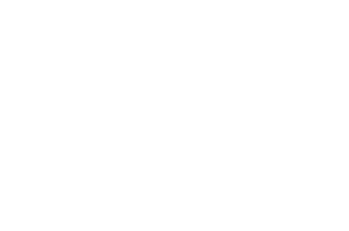

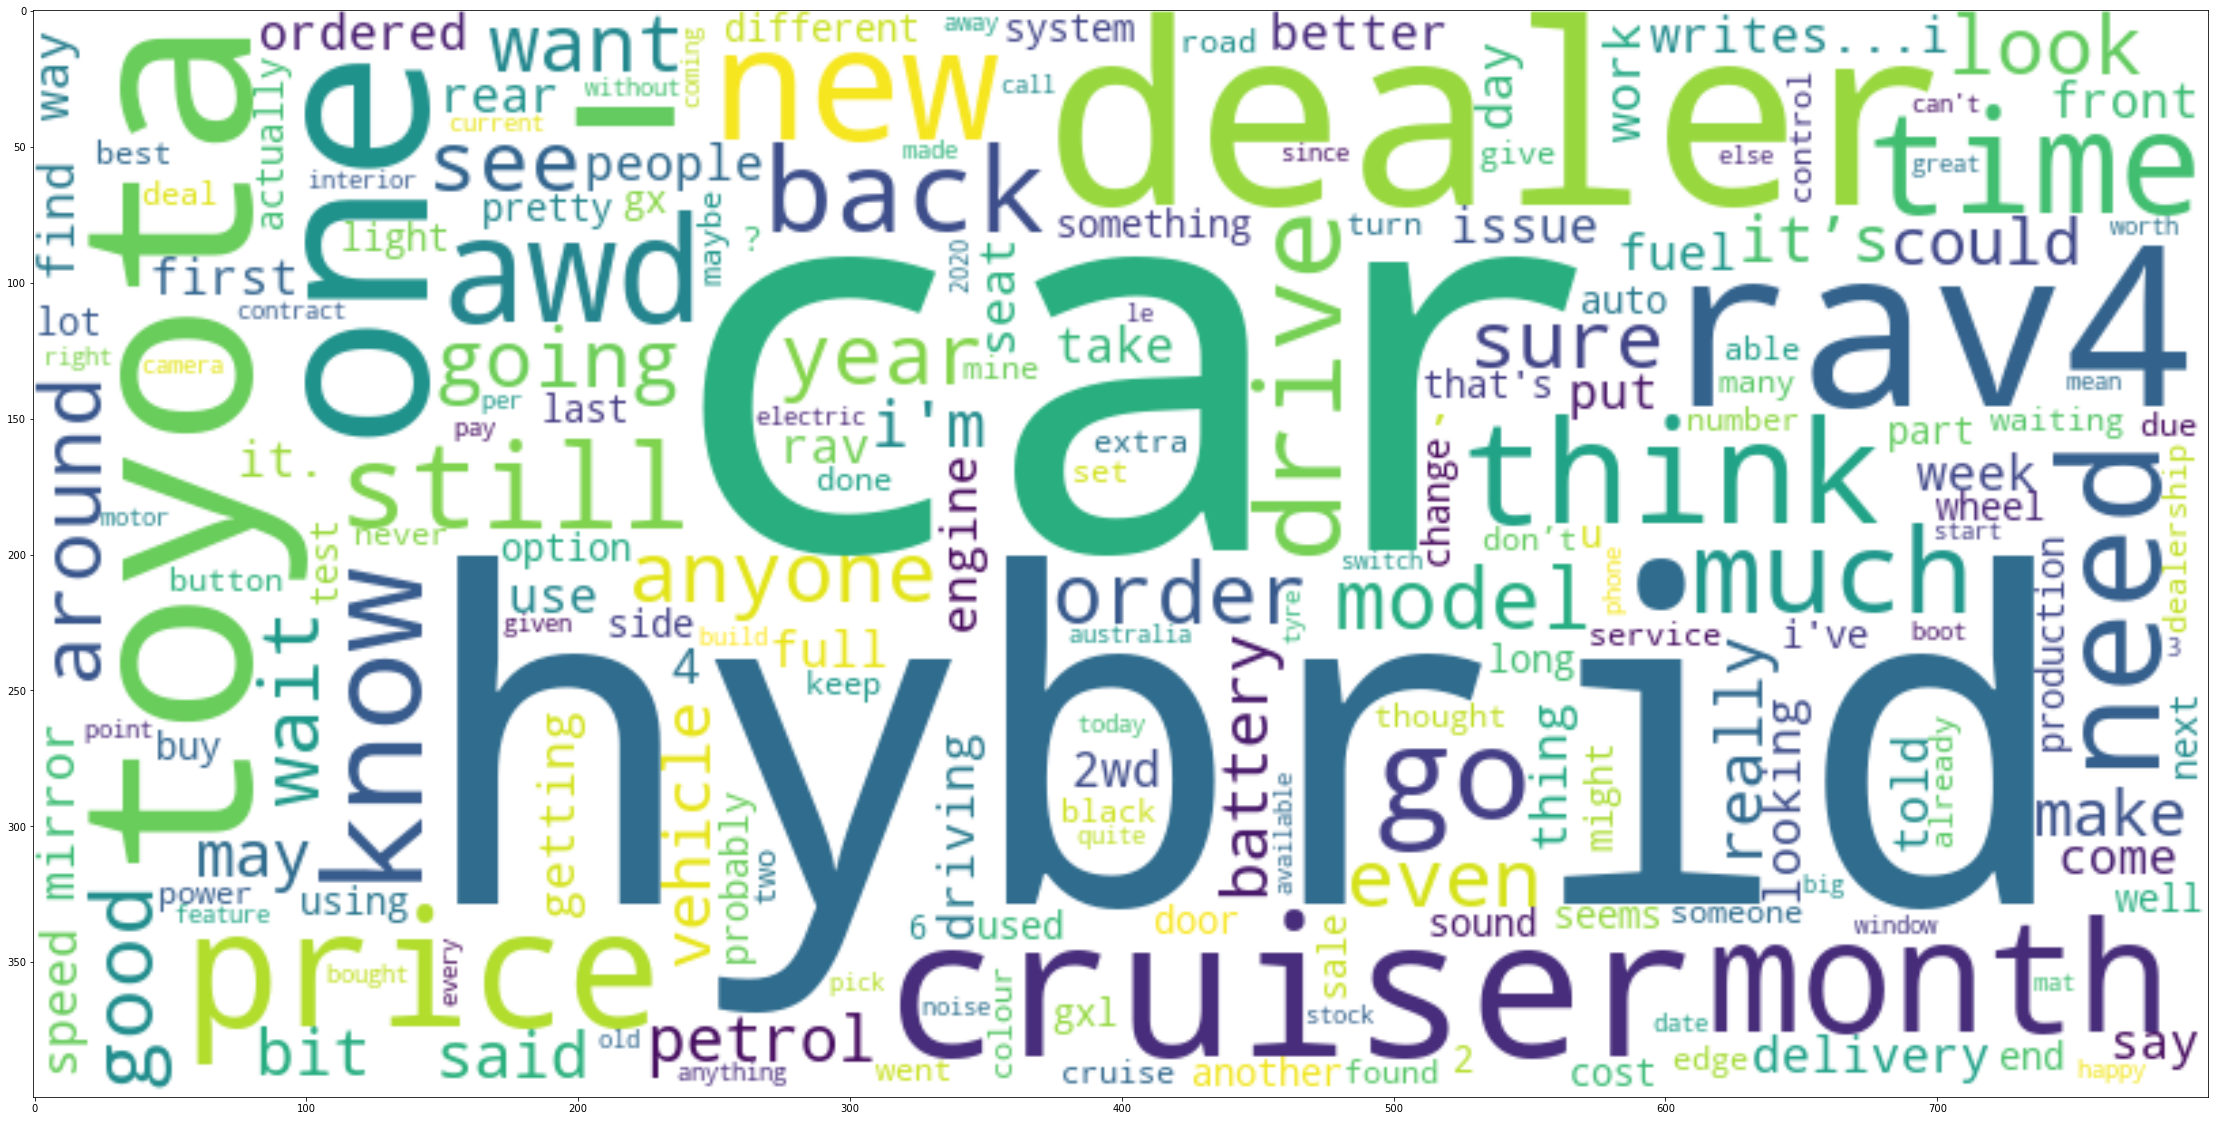

In [51]:
text_count_3 = toyota_rav4_date.lemmatized_review.explode().value_counts()

# We can also use the count to generate the wordcloud
wordcloud_3 = WordCloud(stopwords=stopword, background_color="white", width=800, height=400).generate_from_frequencies(text_count_3)
import matplotlib.pyplot as plt
plt.axis("off")
plt.figure( figsize=(40,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud_3, interpolation='bilinear')
plt.show()

In [52]:
text_count_3.head(30)

car        2122
hybrid     1670
dealer     1240
toyota     1117
–          1063
rav4        973
one         972
cruiser     905
price       767
new         735
month       706
awd         631
think       588
time        588
need        563
know        550
go          534
still       522
drive       521
much        496
back        485
anyone      479
order       469
see         460
year        459
good        459
model       454
around      454
even        439
want        437
Name: lemmatized_review, dtype: int64

In [53]:
toyota_rav4_keyword_filter = toyota_rav4_date[toyota_rav4_date['Review'].str.contains("test drive|testdrive|GXL|gxl|test drove|pros|picked|GX|gx|Hybrid|hybrid|Cruiser|cruiser|edge|Edge")]

In [54]:
toyota_rav4_keyword_filter.count()

Review               2055
Date posted          2055
Reference url        2055
no_url               2055
tokenized            2055
no_stopwords         2055
stemmed_review       2055
lemmatized_review    2055
dtype: int64

In [55]:
toyota_rav4_keyword_filter['no_url'] = toyota_rav4_keyword_filter['Review'].apply(lambda x: remove_URL(x))
toyota_rav4_keyword_filter.head(20)

Review Date posted  \
433  Agree. Second row room seems fine to me. I'm 6...  2019-05-14   
435  It's not so much how much room rear passengers...  2019-05-14   
436  JRCD1 writes...Where I found issue with the Ra...  2019-05-14   
438  Demegod writes...Care to tell us the electric ...  2019-05-14   
439  AMG S writes...The second row feel a bit small...  2019-05-14   
442  Punchcard writes...A Prius Hybrid (NiMH models...  2019-05-14   
445  aesthetics1210 writes...Going to test drive a ...  2019-05-14   
447  Got atomic rush colour  2.5L cruiser hybrid 2w...  2019-05-14   
448  #Tonez writes...Got atomic rush colour  2.5L c...  2019-05-14   
452  Gamilon writes...4K of rrp? That's amazing. We...  2019-05-14   
462  user8976 writes...Do people find the 2WD and A...  2019-05-15   
463  Calvin_wp writes...power units are obviously n...  2019-05-15   
465  Driver6M writes...Not exactly. The AWD hybrid ...  2019-05-15   
469  Demegod writes...Sydney City Toyota has some g...  2019-05-15   
475  Peter Zhau writes...Any deal with WA dealers?I...  2019-05-15   
476  Thanks for the price points for WA. We test dr...  2019-05-15   
477  #Tonez writes...Got atomic rush colour  2.5L c...  2019-05-15   
478  Orkstomper writes...FWD Hybrid Cruiser, premiu...  2019-05-15   
479  Driver6M writes...Not exactly. The AWD hybrid ...  2019-05-16   
480  Calvin_wp writes...Interesting question. theor...  2019-05-16   

      Reference url                                             no_url  \
433  whrl.pl/RfmIPF  Agree. Second row room seems fine to me. I'm 6...   
435  whrl.pl/RfmI6y  It's not so much how much room rear passengers...   
436  whrl.pl/RfmJfi  JRCD1 writes...Where I found issue with the Ra...   
438  whrl.pl/RfmJkx  Demegod writes...Care to tell us the electric ...   
439  whrl.pl/RfmJk6  AMG S writes...The second row feel a bit small...   
442  whrl.pl/RfmJmw  Punchcard writes...A Prius Hybrid (NiMH models...   
445  whrl.pl/RfmJqy  aesthetics1210 writes...Going to test drive a ...   
447  whrl.pl/RfmJOL  Got atomic rush colour  2.5L cruiser hybrid 2w...   
448  whrl.pl/RfmJRH  #Tonez writes...Got atomic rush colour  2.5L c...   
452  whrl.pl/RfmJ1i  Gamilon writes...4K of rrp? That's amazing. We...   
462  whrl.pl/RfmLf9  user8976 writes...Do people find the 2WD and A...   
463  whrl.pl/RfmLh0  Calvin_wp writes...power units are obviously n...   
465  whrl.pl/RfmLj9  Driver6M writes...Not exactly. The AWD hybrid ...   
469  whrl.pl/RfmMb5  Demegod writes...Sydney City Toyota has some g...   
475  whrl.pl/RfmMQT  Peter Zhau writes...Any deal with WA dealers?I...   
476  whrl.pl/RfmMTC  Thanks for the price points for WA. We test dr...   
477  whrl.pl/RfmMTG  #Tonez writes...Got atomic rush colour  2.5L c...   
478  whrl.pl/RfmMZD  Orkstomper writes...FWD Hybrid Cruiser, premiu...   
479  whrl.pl/RfmM86  Driver6M writes...Not exactly. The AWD hybrid ...   
480  whrl.pl/RfmNeF  Calvin_wp writes...Interesting question. theor...   

                                             tokenized  \
433  [agree., second, row, room, seems, fine, to, m...   
435  [it's, not, so, much, how, much, room, rear, p...   
436  [jrcd1, writes...where, i, found, issue, with,...   
438  [demegod, writes...care, to, tell, us, the, el...   
439  [amg, s, writes...the, second, row, feel, a, b...   
442  [punchcard, writes...a, prius, hybrid, (nimh, ...   
445  [aesthetics1210, writes...going, to, test, dri...   
447  [got, atomic, rush, colour, 2.5l, cruiser, hyb...   
448  [#tonez, writes...got, atomic, rush, colour, 2...   
452  [gamilon, writes...4k, of, rrp?, that's, amazi...   
462  [user8976, writes...do, people, find, the, 2wd...   
463  [calvin_wp, writes...power, units, are, obviou...   
465  [driver6m, writes...not, exactly., the, awd, h...   
469  [demegod, writes...sydney, city, toyota, has, ...   
475  [peter, zhau, writes...any, deal, with, wa, de...   
476  [thanks, for, the, price, points, for, wa., we...   
477  [#tonez, writes...got, atomic, 

In [56]:
toyota_rav4_keyword_filter['tokenized'] = toyota_rav4_keyword_filter['no_url'].apply(lambda x: tokenization(x.lower()))
toyota_rav4_keyword_filter.head(10)

Review Date posted  \
433  Agree. Second row room seems fine to me. I'm 6...  2019-05-14   
435  It's not so much how much room rear passengers...  2019-05-14   
436  JRCD1 writes...Where I found issue with the Ra...  2019-05-14   
438  Demegod writes...Care to tell us the electric ...  2019-05-14   
439  AMG S writes...The second row feel a bit small...  2019-05-14   
442  Punchcard writes...A Prius Hybrid (NiMH models...  2019-05-14   
445  aesthetics1210 writes...Going to test drive a ...  2019-05-14   
447  Got atomic rush colour  2.5L cruiser hybrid 2w...  2019-05-14   
448  #Tonez writes...Got atomic rush colour  2.5L c...  2019-05-14   
452  Gamilon writes...4K of rrp? That's amazing. We...  2019-05-14   

      Reference url                                             no_url  \
433  whrl.pl/RfmIPF  Agree. Second row room seems fine to me. I'm 6...   
435  whrl.pl/RfmI6y  It's not so much how much room rear passengers...   
436  whrl.pl/RfmJfi  JRCD1 writes...Where I found issue with the Ra...   
438  whrl.pl/RfmJkx  Demegod writes...Care to tell us the electric ...   
439  whrl.pl/RfmJk6  AMG S writes...The second row feel a bit small...   
442  whrl.pl/RfmJmw  Punchcard writes...A Prius Hybrid (NiMH models...   
445  whrl.pl/RfmJqy  aesthetics1210 writes...Going to test drive a ...   
447  whrl.pl/RfmJOL  Got atomic rush colour  2.5L cruiser hybrid 2w...   
448  whrl.pl/RfmJRH  #Tonez writes...Got atomic rush colour  2.5L c...   
452  whrl.pl/RfmJ1i  Gamilon writes...4K of rrp? That's amazing. We...   

                                             tokenized  \
433  [agree., second, row, room, seems, fine, to, m...   
435  [it's, not, so, much, how, much, room, rear, p...   
436  [jrcd1, writes...where, i, found, issue, with,...   
438  [demegod, writes...care, to, tell, us, the, el...   
439  [amg, s, writes...the, second, row, feel, a, b...   
442  [punchcard, writes...a, prius, hybrid, (nimh, ...   
445  [aesthetics1210, writes...going, to, test, dri...   
447  [got, atomic, rush, colour, 2.5l, cruiser, hyb...   
448  [#tonez, writes...got, atomic, rush, colour, 2...   
452  [gamilon, writes...4k, of, rrp?, that's, amazi...   

                                          no_stopwords  \
433  [agree., second, row, room, seems, fine, me., ...   
435  [much, much, room, rear, passengers, rearward,...   
436  [jrcd1, writes...where, found, issue, rav4, fr...   
438  [demegod, writes...care, tell, us, electric, r...   
439  [amg, writes...the, second, row, feel, bit, sm...   
442  [punchcard, writes...a, prius, hybrid, (nimh, ...   
445  [aesthetics1210, writes...going, test, drive, ...   
447  [atomic, rush, colour, 2.5l, cruiser, hybrid, ...   
448  [#tonez, writes...got, atomic, rush, colour, 2...   
452  [gamilon, writes...4k, rrp?, that's, amazing.,...   

                                        stemmed_review  \
433  [agree., second, row, room, seem, fine, me., i...   
435  [much, much, room, rear, passeng, rearward, fa...   
436  [jrcd1, writes...wher, found, issu, rav4, fron...   
438  [demegod, writes...car, tell, us, electr, rang...   
439  [amg, writes...th, second, row, feel, bit, sma...   
442  [punchcard, writes...a, priu, hybrid, (nimh, m...   
445  [aesthetics1210, writes...go, test, drive, rav...   
447  [atom, rush, colour, 2.5l, cruiser, hybrid, 2w...   
448  [#tonez, writes...got, atom, rush, colour, 2.5...   
452  [gamilon, writes...4k, rrp?, that', amazing., ...   

                                     lemmatized_review  
433  [agree., second, row, room, seems, fine, me., ...  
435  [much, much, room, rear, passenger, rearward, ...  
436  [jrcd1, writes...where, found, issue, rav4, fr...  
438  [demegod, writes...care, tell, u, electric, ra...  
439  [amg, writes...the, second, row, feel, bit, sm...  
442  [punchcard, writes...a, prius, hybrid, (nimh, ...  
445  [aesthetics1210, writes...going, test, drive, ...  
447  [atomic, rush, colour, 2.5l, cruiser, hybrid, ...  
448  [#tonez, writes...got, atom

In [57]:
toyota_rav4_keyword_filter['no_stopwords'] = toyota_rav4_keyword_filter['tokenized'].apply(lambda x: remove_stopwords(x))
toyota_rav4_keyword_filter.head(10)

Review Date posted  \
433  Agree. Second row room seems fine to me. I'm 6...  2019-05-14   
435  It's not so much how much room rear passengers...  2019-05-14   
436  JRCD1 writes...Where I found issue with the Ra...  2019-05-14   
438  Demegod writes...Care to tell us the electric ...  2019-05-14   
439  AMG S writes...The second row feel a bit small...  2019-05-14   
442  Punchcard writes...A Prius Hybrid (NiMH models...  2019-05-14   
445  aesthetics1210 writes...Going to test drive a ...  2019-05-14   
447  Got atomic rush colour  2.5L cruiser hybrid 2w...  2019-05-14   
448  #Tonez writes...Got atomic rush colour  2.5L c...  2019-05-14   
452  Gamilon writes...4K of rrp? That's amazing. We...  2019-05-14   

      Reference url                                             no_url  \
433  whrl.pl/RfmIPF  Agree. Second row room seems fine to me. I'm 6...   
435  whrl.pl/RfmI6y  It's not so much how much room rear passengers...   
436  whrl.pl/RfmJfi  JRCD1 writes...Where I found issue with the Ra...   
438  whrl.pl/RfmJkx  Demegod writes...Care to tell us the electric ...   
439  whrl.pl/RfmJk6  AMG S writes...The second row feel a bit small...   
442  whrl.pl/RfmJmw  Punchcard writes...A Prius Hybrid (NiMH models...   
445  whrl.pl/RfmJqy  aesthetics1210 writes...Going to test drive a ...   
447  whrl.pl/RfmJOL  Got atomic rush colour  2.5L cruiser hybrid 2w...   
448  whrl.pl/RfmJRH  #Tonez writes...Got atomic rush colour  2.5L c...   
452  whrl.pl/RfmJ1i  Gamilon writes...4K of rrp? That's amazing. We...   

                                             tokenized  \
433  [agree., second, row, room, seems, fine, to, m...   
435  [it's, not, so, much, how, much, room, rear, p...   
436  [jrcd1, writes...where, i, found, issue, with,...   
438  [demegod, writes...care, to, tell, us, the, el...   
439  [amg, s, writes...the, second, row, feel, a, b...   
442  [punchcard, writes...a, prius, hybrid, (nimh, ...   
445  [aesthetics1210, writes...going, to, test, dri...   
447  [got, atomic, rush, colour, 2.5l, cruiser, hyb...   
448  [#tonez, writes...got, atomic, rush, colour, 2...   
452  [gamilon, writes...4k, of, rrp?, that's, amazi...   

                                          no_stopwords  \
433  [agree., second, row, room, seems, fine, me., ...   
435  [much, much, room, rear, passengers, rearward,...   
436  [jrcd1, writes...where, found, issue, rav4, fr...   
438  [demegod, writes...care, tell, us, electric, r...   
439  [amg, writes...the, second, row, feel, bit, sm...   
442  [punchcard, writes...a, prius, hybrid, (nimh, ...   
445  [aesthetics1210, writes...going, test, drive, ...   
447  [atomic, rush, colour, 2.5l, cruiser, hybrid, ...   
448  [#tonez, writes...got, atomic, rush, colour, 2...   
452  [gamilon, writes...4k, rrp?, that's, amazing.,...   

                                        stemmed_review  \
433  [agree., second, row, room, seem, fine, me., i...   
435  [much, much, room, rear, passeng, rearward, fa...   
436  [jrcd1, writes...wher, found, issu, rav4, fron...   
438  [demegod, writes...car, tell, us, electr, rang...   
439  [amg, writes...th, second, row, feel, bit, sma...   
442  [punchcard, writes...a, priu, hybrid, (nimh, m...   
445  [aesthetics1210, writes...go, test, drive, rav...   
447  [atom, rush, colour, 2.5l, cruiser, hybrid, 2w...   
448  [#tonez, writes...got, atom, rush, colour, 2.5...   
452  [gamilon, writes...4k, rrp?, that', amazing., ...   

                                     lemmatized_review  
433  [agree., second, row, room, seems, fine, me., ...  
435  [much, much, room, rear, passenger, rearward, ...  
436  [jrcd1, writes...where, found, issue, rav4, fr...  
438  [demegod, writes...care, tell, u, electric, ra...  
439  [amg, writes...the, second, row, feel, bit, sm...  
442  [punchcard, writes...a, prius, hybrid, (nimh, ...  
445  [aesthetics1210, writes...going, test, drive, ...  
447  [atomic, rush, colour, 2.5l, cruiser, hybrid, ...  
448  [#tonez, writes...got, atom

In [58]:
toyota_rav4_keyword_filter['stemmed_review'] = toyota_rav4_keyword_filter['no_stopwords'].apply(lambda x: stemming(x))
toyota_rav4_keyword_filter.head(10)

Review Date posted  \
433  Agree. Second row room seems fine to me. I'm 6...  2019-05-14   
435  It's not so much how much room rear passengers...  2019-05-14   
436  JRCD1 writes...Where I found issue with the Ra...  2019-05-14   
438  Demegod writes...Care to tell us the electric ...  2019-05-14   
439  AMG S writes...The second row feel a bit small...  2019-05-14   
442  Punchcard writes...A Prius Hybrid (NiMH models...  2019-05-14   
445  aesthetics1210 writes...Going to test drive a ...  2019-05-14   
447  Got atomic rush colour  2.5L cruiser hybrid 2w...  2019-05-14   
448  #Tonez writes...Got atomic rush colour  2.5L c...  2019-05-14   
452  Gamilon writes...4K of rrp? That's amazing. We...  2019-05-14   

      Reference url                                             no_url  \
433  whrl.pl/RfmIPF  Agree. Second row room seems fine to me. I'm 6...   
435  whrl.pl/RfmI6y  It's not so much how much room rear passengers...   
436  whrl.pl/RfmJfi  JRCD1 writes...Where I found issue with the Ra...   
438  whrl.pl/RfmJkx  Demegod writes...Care to tell us the electric ...   
439  whrl.pl/RfmJk6  AMG S writes...The second row feel a bit small...   
442  whrl.pl/RfmJmw  Punchcard writes...A Prius Hybrid (NiMH models...   
445  whrl.pl/RfmJqy  aesthetics1210 writes...Going to test drive a ...   
447  whrl.pl/RfmJOL  Got atomic rush colour  2.5L cruiser hybrid 2w...   
448  whrl.pl/RfmJRH  #Tonez writes...Got atomic rush colour  2.5L c...   
452  whrl.pl/RfmJ1i  Gamilon writes...4K of rrp? That's amazing. We...   

                                             tokenized  \
433  [agree., second, row, room, seems, fine, to, m...   
435  [it's, not, so, much, how, much, room, rear, p...   
436  [jrcd1, writes...where, i, found, issue, with,...   
438  [demegod, writes...care, to, tell, us, the, el...   
439  [amg, s, writes...the, second, row, feel, a, b...   
442  [punchcard, writes...a, prius, hybrid, (nimh, ...   
445  [aesthetics1210, writes...going, to, test, dri...   
447  [got, atomic, rush, colour, 2.5l, cruiser, hyb...   
448  [#tonez, writes...got, atomic, rush, colour, 2...   
452  [gamilon, writes...4k, of, rrp?, that's, amazi...   

                                          no_stopwords  \
433  [agree., second, row, room, seems, fine, me., ...   
435  [much, much, room, rear, passengers, rearward,...   
436  [jrcd1, writes...where, found, issue, rav4, fr...   
438  [demegod, writes...care, tell, us, electric, r...   
439  [amg, writes...the, second, row, feel, bit, sm...   
442  [punchcard, writes...a, prius, hybrid, (nimh, ...   
445  [aesthetics1210, writes...going, test, drive, ...   
447  [atomic, rush, colour, 2.5l, cruiser, hybrid, ...   
448  [#tonez, writes...got, atomic, rush, colour, 2...   
452  [gamilon, writes...4k, rrp?, that's, amazing.,...   

                                        stemmed_review  \
433  [agree., second, row, room, seem, fine, me., i...   
435  [much, much, room, rear, passeng, rearward, fa...   
436  [jrcd1, writes...wher, found, issu, rav4, fron...   
438  [demegod, writes...car, tell, us, electr, rang...   
439  [amg, writes...th, second, row, feel, bit, sma...   
442  [punchcard, writes...a, priu, hybrid, (nimh, m...   
445  [aesthetics1210, writes...go, test, drive, rav...   
447  [atom, rush, colour, 2.5l, cruiser, hybrid, 2w...   
448  [#tonez, writes...got, atom, rush, colour, 2.5...   
452  [gamilon, writes...4k, rrp?, that', amazing., ...   

                                     lemmatized_review  
433  [agree., second, row, room, seems, fine, me., ...  
435  [much, much, room, rear, passenger, rearward, ...  
436  [jrcd1, writes...where, found, issue, rav4, fr...  
438  [demegod, writes...care, tell, u, electric, ra...  
439  [amg, writes...the, second, row, feel, bit, sm...  
442  [punchcard, writes...a, prius, hybrid, (nimh, ...  
445  [aesthetics1210, writes...going, test, drive, ...  
447  [atomic, rush, colour, 2.5l, cruiser, hybrid, ...  
448  [#tonez, writes...got, atom

In [59]:
toyota_rav4_keyword_filter['lemmatized_review'] = toyota_rav4_keyword_filter['no_stopwords'].apply(lambda x: lemmatizer(x))
toyota_rav4_keyword_filter.head(10)

Review Date posted  \
433  Agree. Second row room seems fine to me. I'm 6...  2019-05-14   
435  It's not so much how much room rear passengers...  2019-05-14   
436  JRCD1 writes...Where I found issue with the Ra...  2019-05-14   
438  Demegod writes...Care to tell us the electric ...  2019-05-14   
439  AMG S writes...The second row feel a bit small...  2019-05-14   
442  Punchcard writes...A Prius Hybrid (NiMH models...  2019-05-14   
445  aesthetics1210 writes...Going to test drive a ...  2019-05-14   
447  Got atomic rush colour  2.5L cruiser hybrid 2w...  2019-05-14   
448  #Tonez writes...Got atomic rush colour  2.5L c...  2019-05-14   
452  Gamilon writes...4K of rrp? That's amazing. We...  2019-05-14   

      Reference url                                             no_url  \
433  whrl.pl/RfmIPF  Agree. Second row room seems fine to me. I'm 6...   
435  whrl.pl/RfmI6y  It's not so much how much room rear passengers...   
436  whrl.pl/RfmJfi  JRCD1 writes...Where I found issue with the Ra...   
438  whrl.pl/RfmJkx  Demegod writes...Care to tell us the electric ...   
439  whrl.pl/RfmJk6  AMG S writes...The second row feel a bit small...   
442  whrl.pl/RfmJmw  Punchcard writes...A Prius Hybrid (NiMH models...   
445  whrl.pl/RfmJqy  aesthetics1210 writes...Going to test drive a ...   
447  whrl.pl/RfmJOL  Got atomic rush colour  2.5L cruiser hybrid 2w...   
448  whrl.pl/RfmJRH  #Tonez writes...Got atomic rush colour  2.5L c...   
452  whrl.pl/RfmJ1i  Gamilon writes...4K of rrp? That's amazing. We...   

                                             tokenized  \
433  [agree., second, row, room, seems, fine, to, m...   
435  [it's, not, so, much, how, much, room, rear, p...   
436  [jrcd1, writes...where, i, found, issue, with,...   
438  [demegod, writes...care, to, tell, us, the, el...   
439  [amg, s, writes...the, second, row, feel, a, b...   
442  [punchcard, writes...a, prius, hybrid, (nimh, ...   
445  [aesthetics1210, writes...going, to, test, dri...   
447  [got, atomic, rush, colour, 2.5l, cruiser, hyb...   
448  [#tonez, writes...got, atomic, rush, colour, 2...   
452  [gamilon, writes...4k, of, rrp?, that's, amazi...   

                                          no_stopwords  \
433  [agree., second, row, room, seems, fine, me., ...   
435  [much, much, room, rear, passengers, rearward,...   
436  [jrcd1, writes...where, found, issue, rav4, fr...   
438  [demegod, writes...care, tell, us, electric, r...   
439  [amg, writes...the, second, row, feel, bit, sm...   
442  [punchcard, writes...a, prius, hybrid, (nimh, ...   
445  [aesthetics1210, writes...going, test, drive, ...   
447  [atomic, rush, colour, 2.5l, cruiser, hybrid, ...   
448  [#tonez, writes...got, atomic, rush, colour, 2...   
452  [gamilon, writes...4k, rrp?, that's, amazing.,...   

                                        stemmed_review  \
433  [agree., second, row, room, seem, fine, me., i...   
435  [much, much, room, rear, passeng, rearward, fa...   
436  [jrcd1, writes...wher, found, issu, rav4, fron...   
438  [demegod, writes...car, tell, us, electr, rang...   
439  [amg, writes...th, second, row, feel, bit, sma...   
442  [punchcard, writes...a, priu, hybrid, (nimh, m...   
445  [aesthetics1210, writes...go, test, drive, rav...   
447  [atom, rush, colour, 2.5l, cruiser, hybrid, 2w...   
448  [#tonez, writes...got, atom, rush, colour, 2.5...   
452  [gamilon, writes...4k, rrp?, that', amazing., ...   

                                     lemmatized_review  
433  [agree., second, row, room, seems, fine, me., ...  
435  [much, much, room, rear, passenger, rearward, ...  
436  [jrcd1, writes...where, found, issue, rav4, fr...  
438  [demegod, writes...care, tell, u, electric, ra...  
439  [amg, writes...the, second, row, feel, bit, sm...  
442  [punchcard, writes...a, prius, hybrid, (nimh, ...  
445  [aesthetics1210, writes...going, test, drive, ...  
447  [atomic, rush, colour, 2.5l, cruiser, hybrid, ...  
448  [#tonez, writes...got, atom

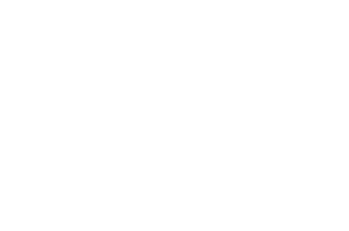

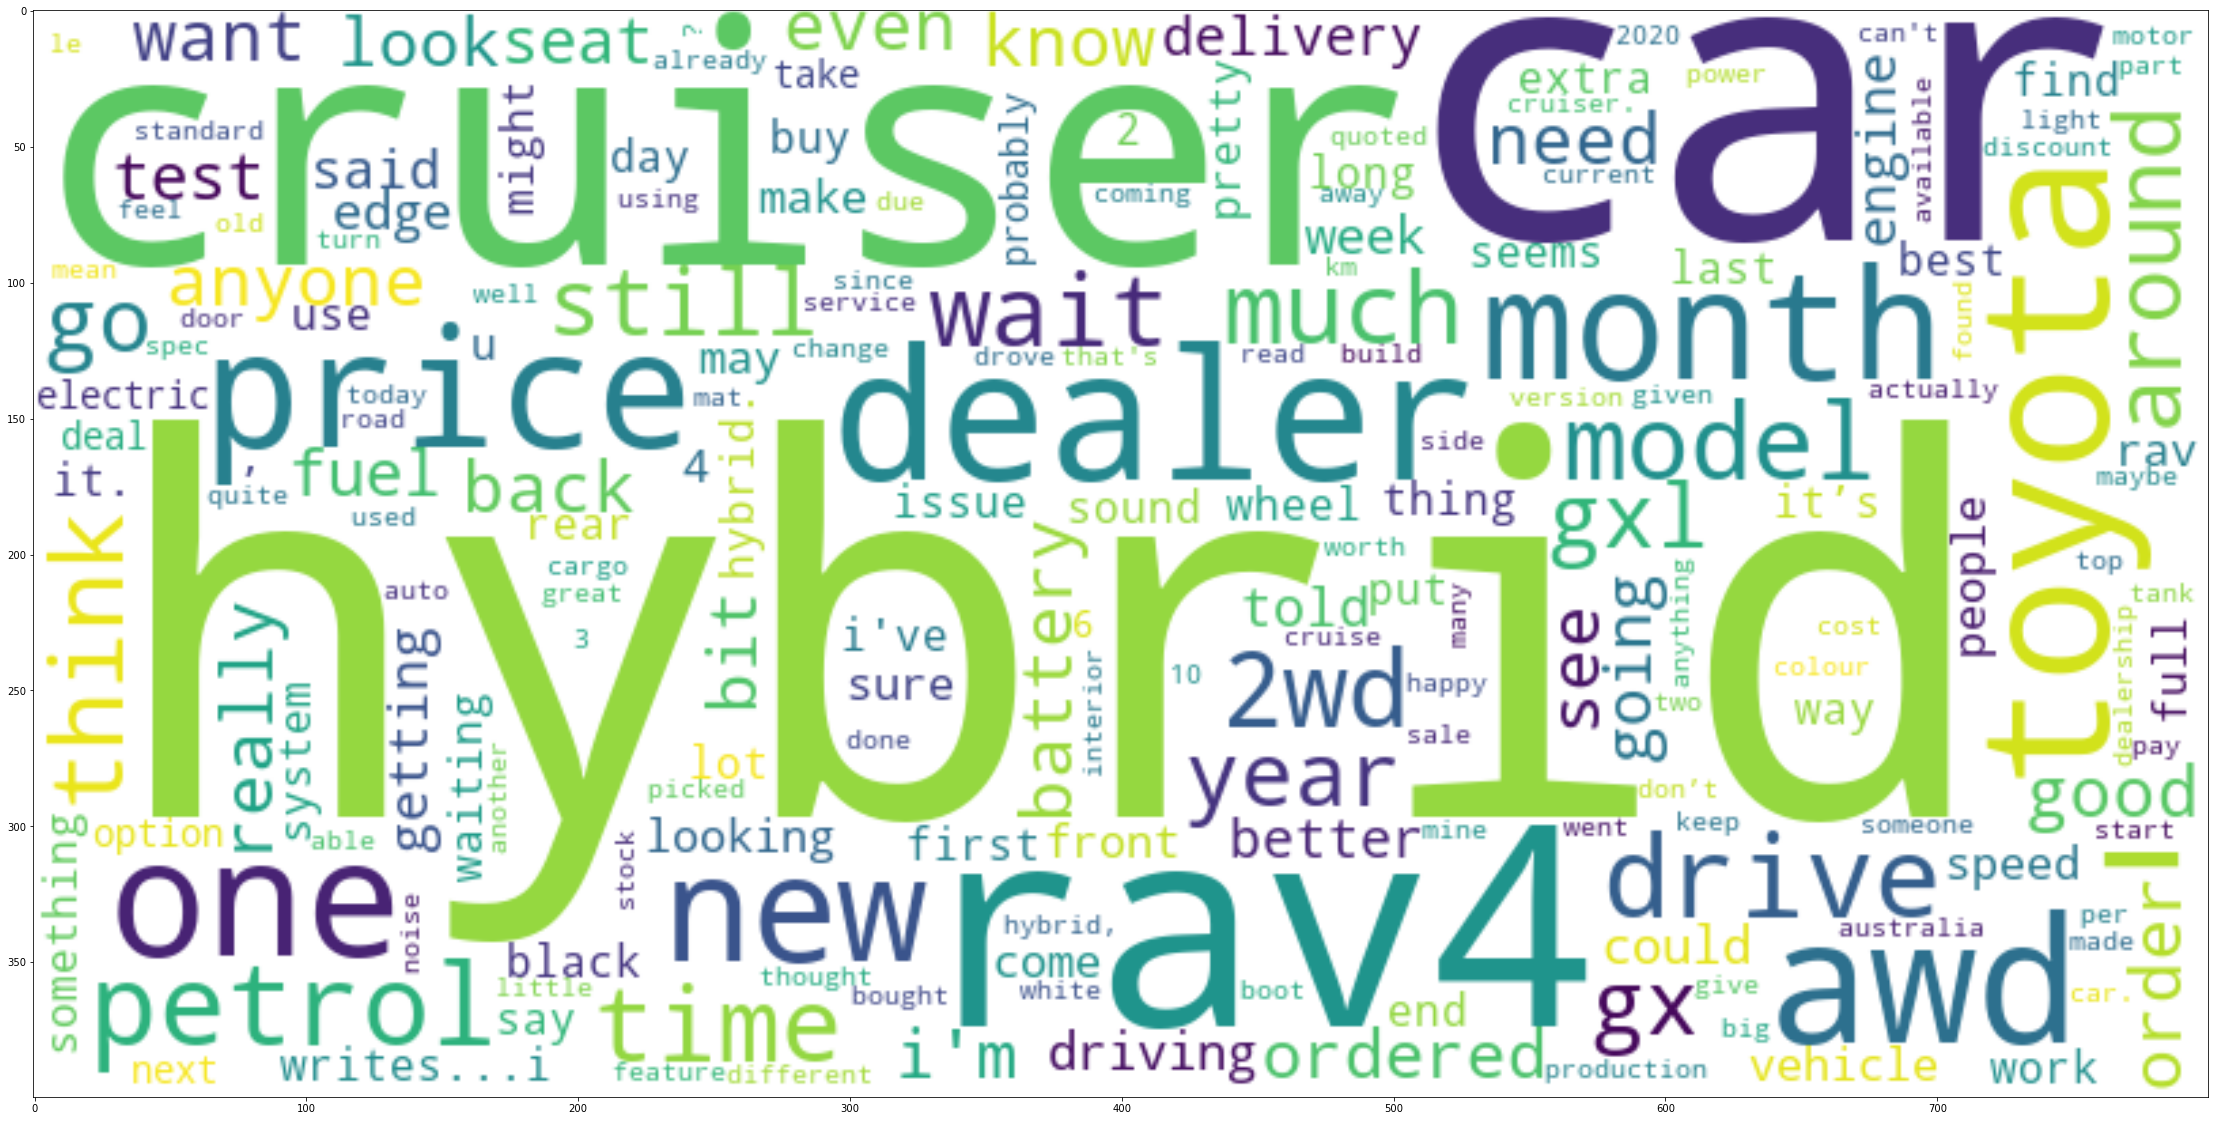

In [60]:
text_count_4 = toyota_rav4_keyword_filter.lemmatized_review.explode().value_counts()

# We can also use the count to generate the wordcloud
wordcloud_4 = WordCloud(stopwords=stopword, background_color="white", width=800, height=400).generate_from_frequencies(text_count_4)
import matplotlib.pyplot as plt
plt.axis("off")
plt.figure( figsize=(40,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud_4, interpolation='bilinear')
plt.show()

In [61]:
text_count_4.head(30)

hybrid     1670
car         932
cruiser     904
rav4        637
dealer      602
toyota      564
–           564
awd         542
price       469
one         462
month       405
new         375
petrol      354
drive       354
2wd         307
model       305
time        290
much        282
think       278
wait        274
still       272
around      270
year        261
go          257
gxl         251
gx          246
anyone      242
need        237
order       235
back        234
Name: lemmatized_review, dtype: int64